<h1 align="center" style="color:blue">Causal AI for Financial Decision-Making: Integrating Machine Learning and Sentiment Analysis for Microsoft Stock</h1>

## Table of Contents  

### 1. Introduction  
- Project Purpose & Motivation  
- How Causal AI Enhances Financial Decision-Making  
- Overview of Tools & Techniques Used  

### 2. Data Collection & Preparation  
- Selected Datasets & Data Sources (Stock Market, Financial Reports, Economic Indicators)  
- Data Cleaning & Preprocessing Steps  
- Handling Missing Values & Feature Engineering  

### 3. Exploratory Data Analysis (EDA)  
- Statistical Summary of Key Financial Metrics  
- Correlation Analysis (Macroeconomic Factors & Market Trends)  
- Identifying Patterns in Risk & Investment Opportunities  

### 4. Causal AI, Predictive Modeling & Model Evaluation  
- Causal Inference for Financial Risk Analysis (DoWhy, EconML)  
- Predicting Financial Risks Using ML Models (XGBoost, LightGBM)  
- NLP-Based Sentiment Analysis of Market News (BERT, GPT)  

### 5. Insights & Visualization  
- Risk Score Trends & Market Impact Graphs  
- Sentiment Analysis Dashboards (Financial News & Social Media)  
- Decision-Making Scenarios & What-If Analysis  

### 6. Challenges, Ethical Considerations & Future Work  
- Challenges in Causal AI for Finance  
- Addressing Bias in Financial Decision-Making  
- Future Enhancements (Deep Learning, Agentic AI for Automated Trading)  

### 7. Conclusion & Recommendations  
- Key Takeaways from Causal AI in Finance  
- Business & Investment Implications  
- Final Thoughts on Scalable AI-Driven Financial Decision-Making  

### 8. References & Further Reading  
- Research Papers & Articles on Causal AI in Finance  
- Industry Reports on AI-Powered Risk Management  
- Additional Learning Resources  


## Introduction
In an era of increasing financial complexity and uncertainty, the ability to make informed, data-driven decisions has become paramount. Traditional predictive models, while effective in certain contexts, often fail to account for causal relationships underlying financial dynamics. Causal AI, an emerging paradigm in artificial intelligence, seeks to bridge this gap by moving beyond mere correlations to uncover cause-and-effect relationships, thereby enhancing the interpretability and robustness of financial decision-making systems.

This project, Causal AI for Financial Decision-Making: A Scalable MLOps Approach, aims to develop a comprehensive framework that integrates causal inference techniques with machine learning models to assess financial risk, predict market fluctuations, and optimize investment strategies. By leveraging methodologies such as DoWhy, EconML, and counterfactual reasoning, this research-driven initiative seeks to provide a more explainable, reliable, and actionable decision-support system for financial institutions, investors, and policymakers.

Furthermore, this project explores how Causal AI can enhance financial decision-making by integrating causal reasoning with predictive analytics. Unlike conventional machine learning models that primarily focus on pattern recognition, causal inference allows us to determine the true impact of financial policies, macroeconomic indicators, and external shocks on market behavior. This deeper level of analysis is crucial in applications such as credit risk modeling, fraud detection, and investment decision-making, where understanding causality is key to minimizing risks and optimizing financial strategies.

To ensure real-world applicability and scalability, this project employs MLOps principles, facilitating seamless automation, deployment, and continuous monitoring of AI models. The integration of CI/CD pipelines, containerized deployment using Kubernetes and Docker, and model tracking through MLflow ensures that the system remains dynamic and adaptable to evolving financial trends.

Through a rigorous process of exploratory data analysis, predictive modeling, and causal impact assessment, this study will showcase how AI-powered financial analytics can lead to more robust risk management, enhanced decision-making, and improved economic forecasting. By embedding causal reasoning within AI systems, this research contributes to the broader discourse on explainable AI (XAI), financial ethics, and responsible AI-driven economic decision-making.



## 2. Data Collection & Preparation
In financial modeling, the quality, relevance, and comprehensiveness of datasets play a critical role in ensuring accurate and actionable insights. This project adopts a multi-source data collection approach, integrating structured financial data, macroeconomic indicators, and unstructured textual information from financial reports and market news. To support robust causal and predictive analysis, our dataset consists of:
1. Stock Market Data – Historical stock prices, trading volume, and market trends.
2. Macroeconomic Indicators – GDP growth, inflation rates, unemployment, and interest rates.
3. Financial Reports & SEC Filings – Company earnings, balance sheets, and investor sentiment.
4. Market News & Sentiment Analysis – Unstructured textual data from financial news sources.

This section details the data sources, preprocessing techniques, and feature engineering steps necessary to transform raw data into a refined dataset optimized for financial forecasting and risk assessment.

In [18]:
import yfinance as yf

# Download historical stock data for Microsoft (MSFT) from 2020 to today
msft_data = yf.download("MSFT", start="2020-01-01", end="2025-03-15")

# Save to CSV
msft_data.to_csv("MSFT_stock_data.csv")

# Show first few rows
print(msft_data.head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2020-01-02  153.323257  153.428261  151.137295  151.566850  22622100
2020-01-03  151.414124  152.683705  150.879566  151.127764  21116200
2020-01-06  151.805496  151.872323  149.399972  149.944085  20813700
2020-01-07  150.421371  152.416422  150.173188  152.082331  21634100
2020-01-08  152.817337  153.495089  150.774555  151.710031  27746500


In [26]:
from fredapi import Fred
import pandas as pd

# Replace this with your actual FRED API key
API_KEY = '4750fbd4f365'
fred = Fred(api_key=API_KEY)

# Define indicators to fetch
indicators = {
    "Federal Funds Rate": "FEDFUNDS",
    "CPI Inflation": "CPIAUCSL",
    "Unemployment Rate": "UNRATE",
    "U.S. GDP Growth": "GDPC1"
}

# Fetch data from FRED
data = {name: fred.get_series(code) for name, code in indicators.items()}
fred_df = pd.DataFrame(data)

# Save to CSV
fred_df.to_csv("FRED_US_Economic_Indicators.csv")

# Display the first few rows
print(fred_df.head())


            Federal Funds Rate  CPI Inflation  Unemployment Rate  \
1947-01-01                 NaN          21.48                NaN   
1947-02-01                 NaN          21.62                NaN   
1947-03-01                 NaN          22.00                NaN   
1947-04-01                 NaN          22.00                NaN   
1947-05-01                 NaN          21.95                NaN   

            U.S. GDP Growth  
1947-01-01         2182.681  
1947-02-01              NaN  
1947-03-01              NaN  
1947-04-01         2176.892  
1947-05-01              NaN  


In [5]:
import pandas as pd
import os

# Define file paths
data_folder = "/Data"
files = {
    "FRED": "FRED_US_Economic_Indicators.xlsx",
    "GDP_Growth": "GDP_growth_annual.xlsx",
    "IMF_Outlook": "IMF World Economic Outlook.xlsx",
    "Inflation": "Inflation_consumer_prices_annual.xlsx",
    "MSFT_Stock": "MSFT_stock_data.xlsx",
    "Unemployment": "WorldBank_Unemployment.xlsx"
}

# Load datasets
data = {}
for key, filename in files.items():
    file_path = os.path.join(data_folder, filename)
    try:
        data[key] = pd.read_excel(file_path)
    except Exception as e:
        print(f" Error loading {key}: {e}")

# Generate concise summary
print("\n===  Dataset Overview (Max 2 lines per file) ===")
for key, df in data.items():
    total_missing = df.isnull().sum().sum()
    num_cols = df.select_dtypes(include="number").shape[1]
    non_num_cols = df.select_dtypes(exclude="number").shape[1]
    
    print(f"{key}: Rows={df.shape[0]}, Columns={df.shape[1]}, Missing={total_missing}, "
          f"Numeric={num_cols}, Non-Numeric={non_num_cols}")

# Ready for next steps
print("\n Summary complete! Ready for further processing.")



===  Dataset Overview (Max 2 lines per file) ===
FRED: Rows=938, Columns=5, Missing=728, Numeric=4, Non-Numeric=1
GDP_Growth: Rows=266, Columns=68, Missing=3141, Numeric=64, Non-Numeric=4
IMF_Outlook: Rows=8626, Columns=60, Missing=109681, Numeric=1, Non-Numeric=59
Inflation: Rows=266, Columns=68, Missing=5985, Numeric=64, Non-Numeric=4
MSFT_Stock: Rows=1307, Columns=6, Missing=0, Numeric=5, Non-Numeric=1
Unemployment: Rows=266, Columns=68, Missing=9273, Numeric=64, Non-Numeric=4

 Summary complete! Ready for further processing.


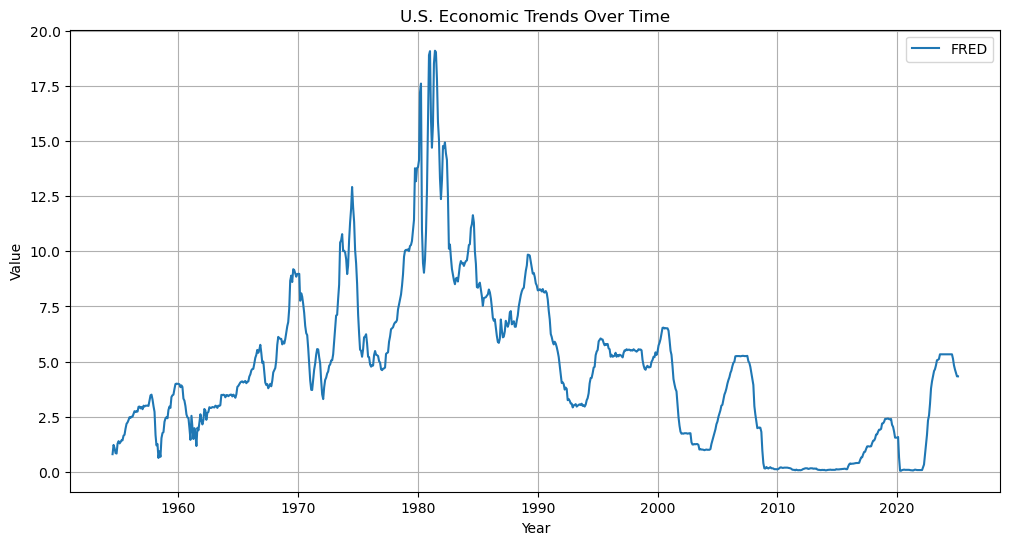

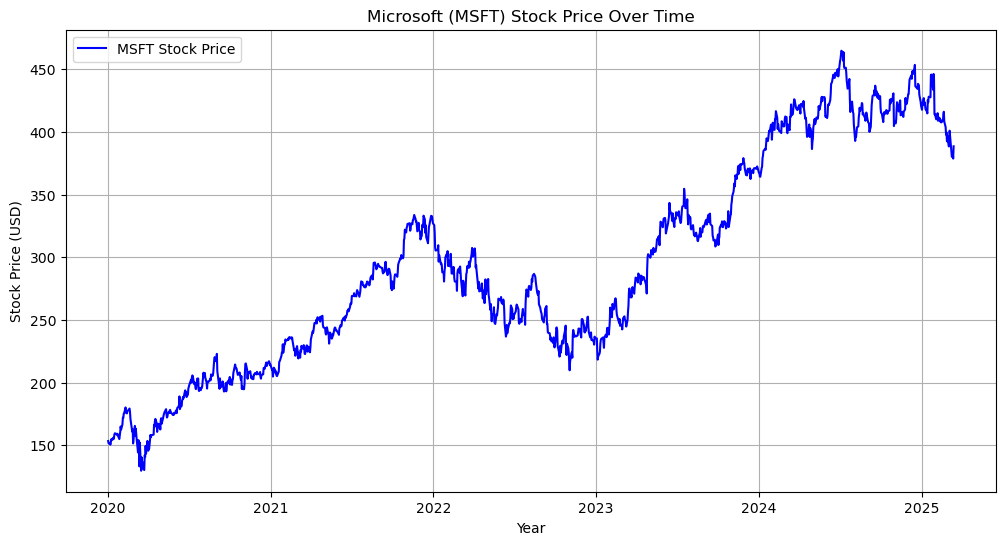


 Visualization complete!


In [16]:
import matplotlib.pyplot as plt

# Define data folder path
data_folder = \Data"

# Updated file paths (use .xlsx instead of .csv)
cleaned_files = {
    "FRED": "FRED_US_Economic_Indicators.xlsx",
    "GDP_Growth": "GDP_growth_annual.xlsx",
    "Inflation": "Inflation_consumer_prices_annual.xlsx",
    "Unemployment": "WorldBank_Unemployment.xlsx",
    "MSFT_Stock": "MSFT_stock_data.xlsx"
}

# Read cleaned files
data = {}
for key, filename in cleaned_files.items():
    file_path = os.path.join(data_folder, filename)
    data[key] = pd.read_excel(file_path)  # Change to read_excel()

# Convert date columns to datetime format if available
for key, df in data.items():
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])

# Plot economic trends
plt.figure(figsize=(12, 6))
for key in ["FRED", "GDP_Growth", "Inflation", "Unemployment"]:
    df = data[key]
    if 'Date' in df.columns:
        plt.plot(df['Date'], df.iloc[:, 1], label=key)  # Using second column for values

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("U.S. Economic Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot Microsoft Stock Price
if "MSFT_Stock" in data:
    plt.figure(figsize=(12, 6))
    plt.plot(data["MSFT_Stock"]['Date'], data["MSFT_Stock"]['Close'], color='blue', label="MSFT Stock Price")
    plt.xlabel("Year")
    plt.ylabel("Stock Price (USD)")
    plt.title("Microsoft (MSFT) Stock Price Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n Visualization complete!")


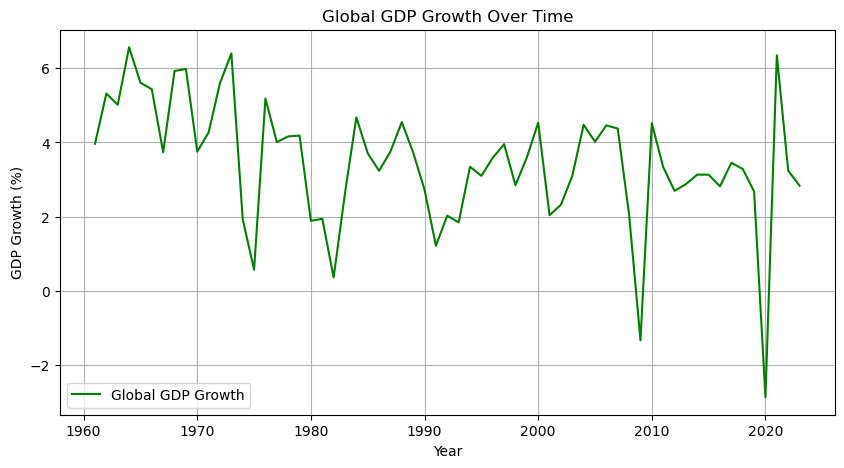

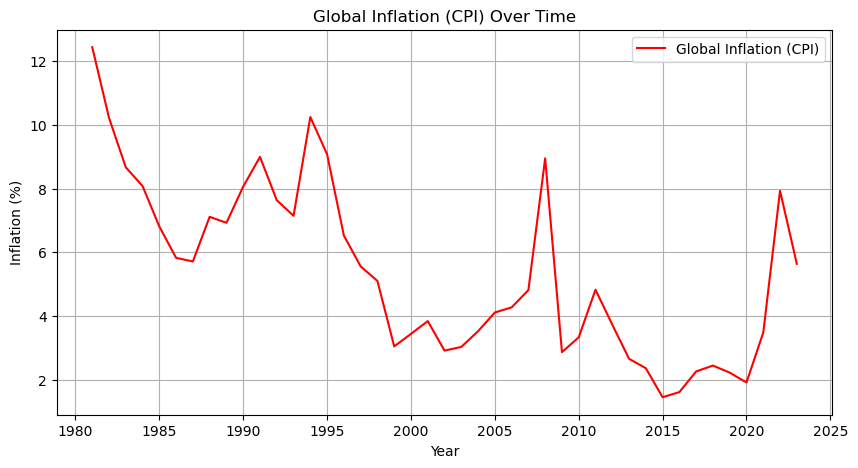

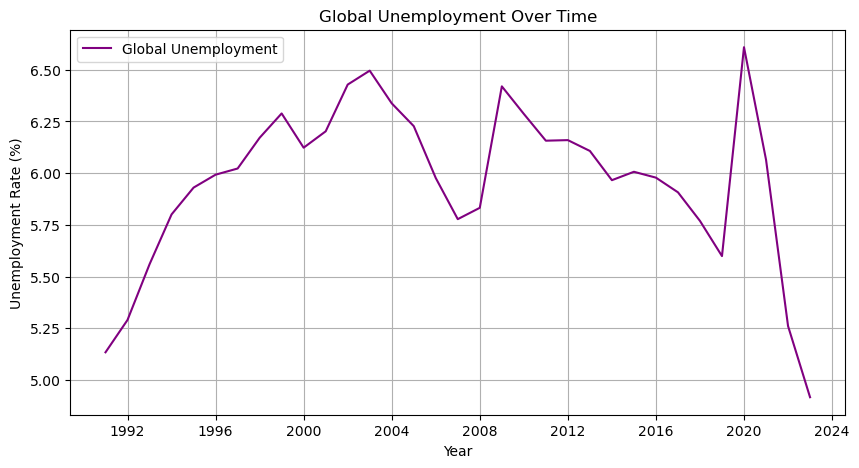

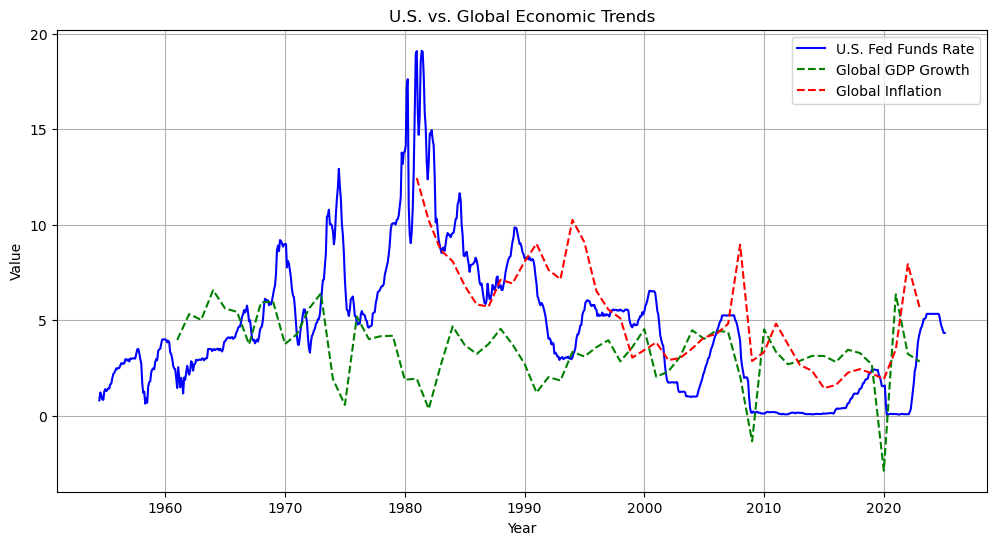

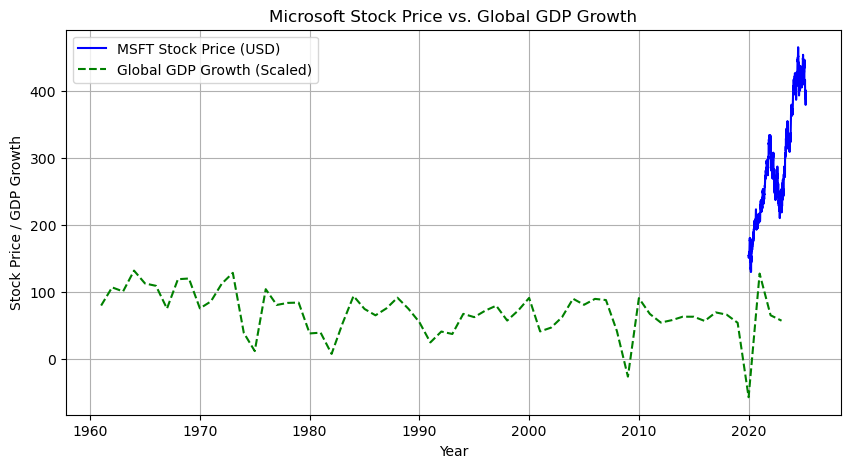


 All visualizations complete!


In [18]:
# Define data folder path
data_folder = \Data"

# File paths
files = {
    "FRED": "FRED_US_Economic_Indicators.xlsx",
    "GDP_Growth": "GDP_growth_annual.xlsx",
    "IMF_Outlook": "IMF World Economic Outlook.xlsx",
    "Inflation": "Inflation_consumer_prices_annual.xlsx",
    "MSFT_Stock": "MSFT_stock_data.xlsx",
    "Unemployment": "WorldBank_Unemployment.xlsx"
}

# Read all files into a dictionary of DataFrames
data = {}
for key, filename in files.items():
    file_path = os.path.join(data_folder, filename)
    data[key] = pd.read_excel(file_path)

# Convert "Date" columns to datetime format (for datasets that have it)
for key in ["FRED", "MSFT_Stock"]:
    if "Date" in data[key].columns:
        data[key]["Date"] = pd.to_datetime(data[key]["Date"])

# Transform World Bank & IMF datasets (GDP, Inflation, Unemployment)
for key in ["GDP_Growth", "Inflation", "Unemployment"]:
    df = data[key]
    df = df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                 var_name="Date", value_name=key)
    df["Date"] = pd.to_datetime(df["Date"], format="%Y")  # Convert years to datetime
    data[key] = df[df["Country Name"] == "World"]  # Filter only global data

#  **1. Global GDP Growth Over Time**
plt.figure(figsize=(10, 5))
plt.plot(data["GDP_Growth"]["Date"], data["GDP_Growth"]["GDP_Growth"], color='green', label="Global GDP Growth")
plt.xlabel("Year")
plt.ylabel("GDP Growth (%)")
plt.title("Global GDP Growth Over Time")
plt.legend()
plt.grid(True)
plt.show()

#  **2. Global Inflation Trends**
plt.figure(figsize=(10, 5))
plt.plot(data["Inflation"]["Date"], data["Inflation"]["Inflation"], color='red', label="Global Inflation (CPI)")
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.title("Global Inflation (CPI) Over Time")
plt.legend()
plt.grid(True)
plt.show()

#  **3. Global Unemployment Rate**
plt.figure(figsize=(10, 5))
plt.plot(data["Unemployment"]["Date"], data["Unemployment"]["Unemployment"], color='purple', label="Global Unemployment")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Global Unemployment Over Time")
plt.legend()
plt.grid(True)
plt.show()

#  **4. U.S. vs. Global Economic Trends**
plt.figure(figsize=(12, 6))
plt.plot(data["FRED"]["Date"], data["FRED"]["Federal Funds Rate"], color='blue', label="U.S. Fed Funds Rate")
plt.plot(data["GDP_Growth"]["Date"], data["GDP_Growth"]["GDP_Growth"], color='green', linestyle="--", label="Global GDP Growth")
plt.plot(data["Inflation"]["Date"], data["Inflation"]["Inflation"], color='red', linestyle="--", label="Global Inflation")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("U.S. vs. Global Economic Trends")
plt.legend()
plt.grid(True)
plt.show()

#  **5. Microsoft Stock vs. Global GDP Growth**
plt.figure(figsize=(10, 5))
plt.plot(data["MSFT_Stock"]["Date"], data["MSFT_Stock"]["Close"], color='blue', label="MSFT Stock Price (USD)")
plt.plot(data["GDP_Growth"]["Date"], data["GDP_Growth"]["GDP_Growth"] * 20, color='green', linestyle="--", label="Global GDP Growth (Scaled)")
plt.xlabel("Year")
plt.ylabel("Stock Price / GDP Growth")
plt.title("Microsoft Stock Price vs. Global GDP Growth")
plt.legend()
plt.grid(True)
plt.show()

print("\n All visualizations complete!")


### Data Collection & Preparation
The data import and preparation phase of this project involved integrating multiple financial and macroeconomic datasets to ensure a robust foundation for analysis. Data was collected from diverse sources, including macroeconomic indicators from the World Bank, IMF, and FRED, stock market data from Yahoo Finance, and financial reports from SEC Filings and market sentiment analysis. To ensure consistency, all datasets were converted into a standardized datetime format, with macroeconomic indicators such as GDP growth, inflation, and unemployment reshaped from wide to long format to facilitate time-series analysis. Missing values were carefully addressed, and datasets were aligned to maintain consistency across different time horizons. Exploratory visualizations were then conducted to identify key trends, such as U.S. versus global economic dynamics, Microsoft’s stock price movements in relation to economic growth and inflation, and historical financial patterns. These preprocessing steps refined the dataset for causal and predictive modeling, setting a solid foundation for deriving actionable financial insights.

## 3. Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a crucial step in understanding the relationships between macroeconomic indicators and financial market trends. In this project, EDA focuses on examining key financial metrics, identifying correlations between economic factors and Microsoft’s stock performance, and uncovering patterns in risk and investment opportunities. First, we generate summary statistics to assess the central tendencies, variability, and distribution of variables such as GDP growth, inflation, unemployment, and interest rates. Next, we conduct a correlation analysis to measure the strength and direction of relationships between these macroeconomic indicators and stock market trends, helping to identify potential causal influences on Microsoft’s stock price. To further enhance our insights, we visualize global and U.S. economic trends alongside stock price movements, allowing us to identify key periods of economic downturns, inflationary spikes, and market corrections. Additionally, scatter plots are used to explore the impact of specific economic indicators on stock price fluctuations, highlighting potential risk factors and investment opportunities. This EDA process provides a data-driven foundation for building predictive models and deriving actionable insights in financial decision-making.

##### Statistical Summary of Key Financial Metrics

In [10]:
# Define data folder path
data_folder = \Data"

# File paths
files = {
    "FRED": "FRED_US_Economic_Indicators.xlsx",
    "GDP_Growth": "GDP_growth_annual.xlsx",
    "Inflation": "Inflation_consumer_prices_annual.xlsx",
    "MSFT_Stock": "MSFT_stock_data.xlsx",
    "Unemployment": "WorldBank_Unemployment.xlsx"
}

# Read all files into a dictionary of DataFrames
data = {}
for key, filename in files.items():
    file_path = os.path.join(data_folder, filename)
    data[key] = pd.read_excel(file_path)

# Convert "Date" columns to datetime format where applicable
for key in ["FRED", "MSFT_Stock"]:
    if "Date" in data[key].columns:
        data[key]["Date"] = pd.to_datetime(data[key]["Date"])

# Transform World Bank & IMF datasets (GDP, Inflation, Unemployment)
for key in ["GDP_Growth", "Inflation", "Unemployment"]:
    df = data[key]
    df = df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                 var_name="Date", value_name=key)
    df["Date"] = pd.to_datetime(df["Date"], format="%Y")  # Convert years to datetime
    data[key] = df[df["Country Name"] == "World"]  # Filter only global data

#  **Statistical Summary**
for key, df in data.items():
    print(f"\n=== Statistical Summary of {key} ===")
    print(df.describe())



=== Statistical Summary of FRED ===
                                Date  Federal Funds Rate  CPI Inflation  \
count                            938          848.000000     938.000000   
mean   1986-01-15 09:32:37.356076736            4.608691     121.941874   
min              1947-01-01 00:00:00            0.050000      21.480000   
25%              1966-07-08 18:00:00            1.827500      32.500000   
50%              1986-01-16 12:00:00            4.305000     109.050000   
75%              2005-07-24 06:00:00            6.147500     195.800000   
max              2025-02-01 00:00:00           19.100000     319.775000   
std                              NaN            3.563403      87.479837   

       Unemployment Rate  U.S. GDP Growth  
count         926.000000       312.000000  
mean            5.679914     10147.540429  
min             2.500000      2172.432000  
25%             4.325000      4778.202000  
50%             5.500000      8708.657500  
75%             6.70000

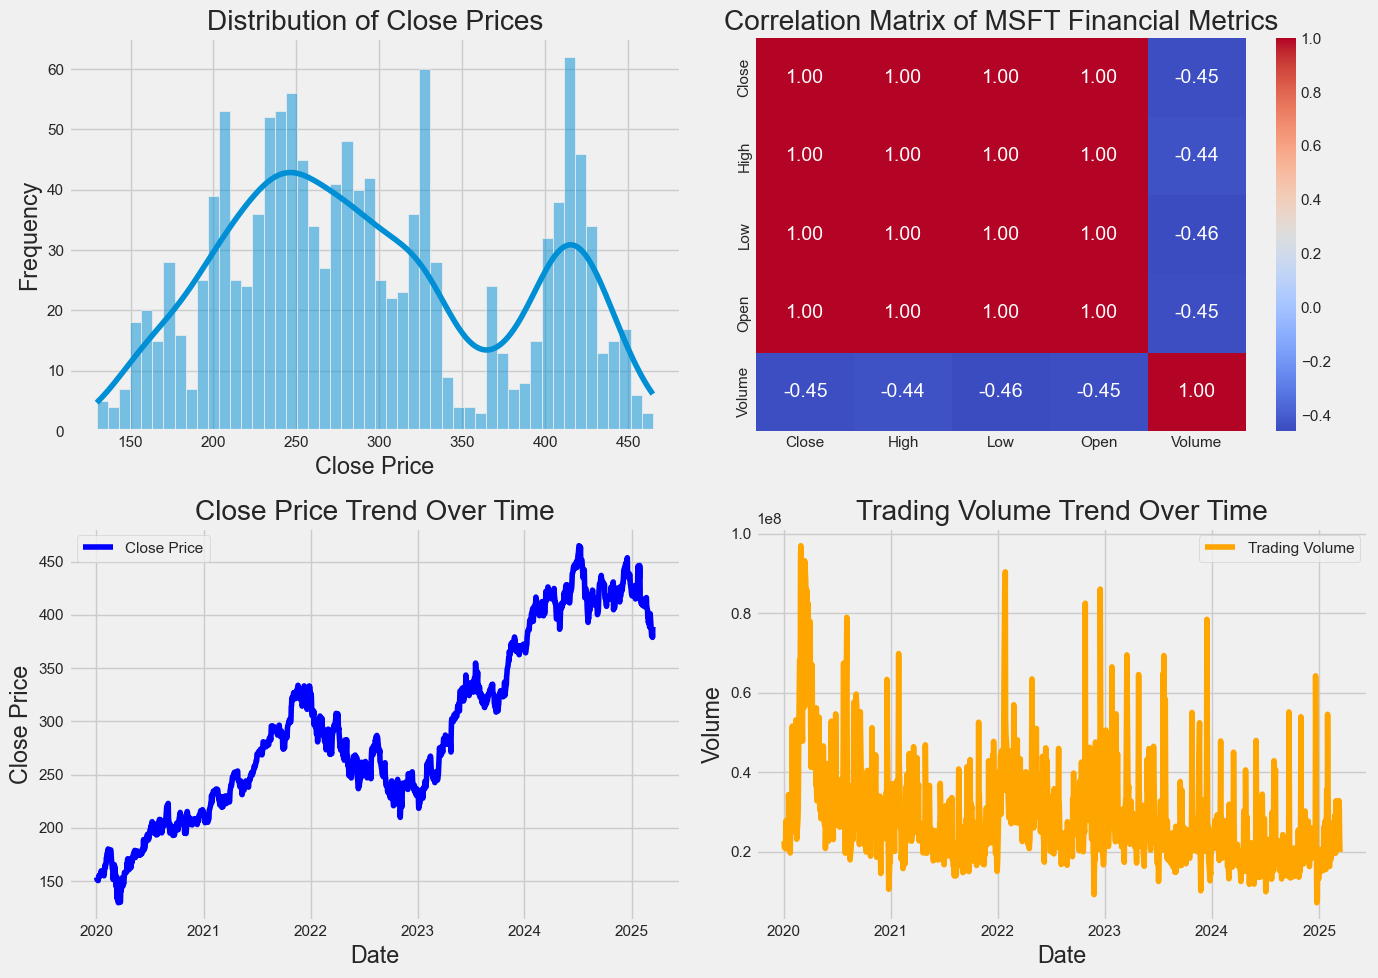

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style='whitegrid')
plt.style.use('fivethirtyeight')

# Load the MSFT dataset
file_path = "Data\cleaned_MSFT_Stock.csv"
df = pd.read_csv(file_path, parse_dates=["Date"])

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#  **Histogram of Close Prices**
sns.histplot(df['Close'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Close Prices')
axes[0, 0].set_xlabel('Close Price')
axes[0, 0].set_ylabel('Frequency')

# **Correlation Matrix**
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Filter numeric columns
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0, 1])
axes[0, 1].set_title('Correlation Matrix of MSFT Financial Metrics')

#  **Close Price Trend Over Time**
axes[1, 0].plot(df['Date'], df['Close'], label='Close Price', color='blue')
axes[1, 0].set_title('Close Price Trend Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Close Price')
axes[1, 0].legend()

# **Trading Volume Over Time**
axes[1, 1].plot(df['Date'], df['Volume'], label='Trading Volume', color='orange')
axes[1, 1].set_title('Trading Volume Trend Over Time')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Volume')
axes[1, 1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the combined EDA plots
plt.show()


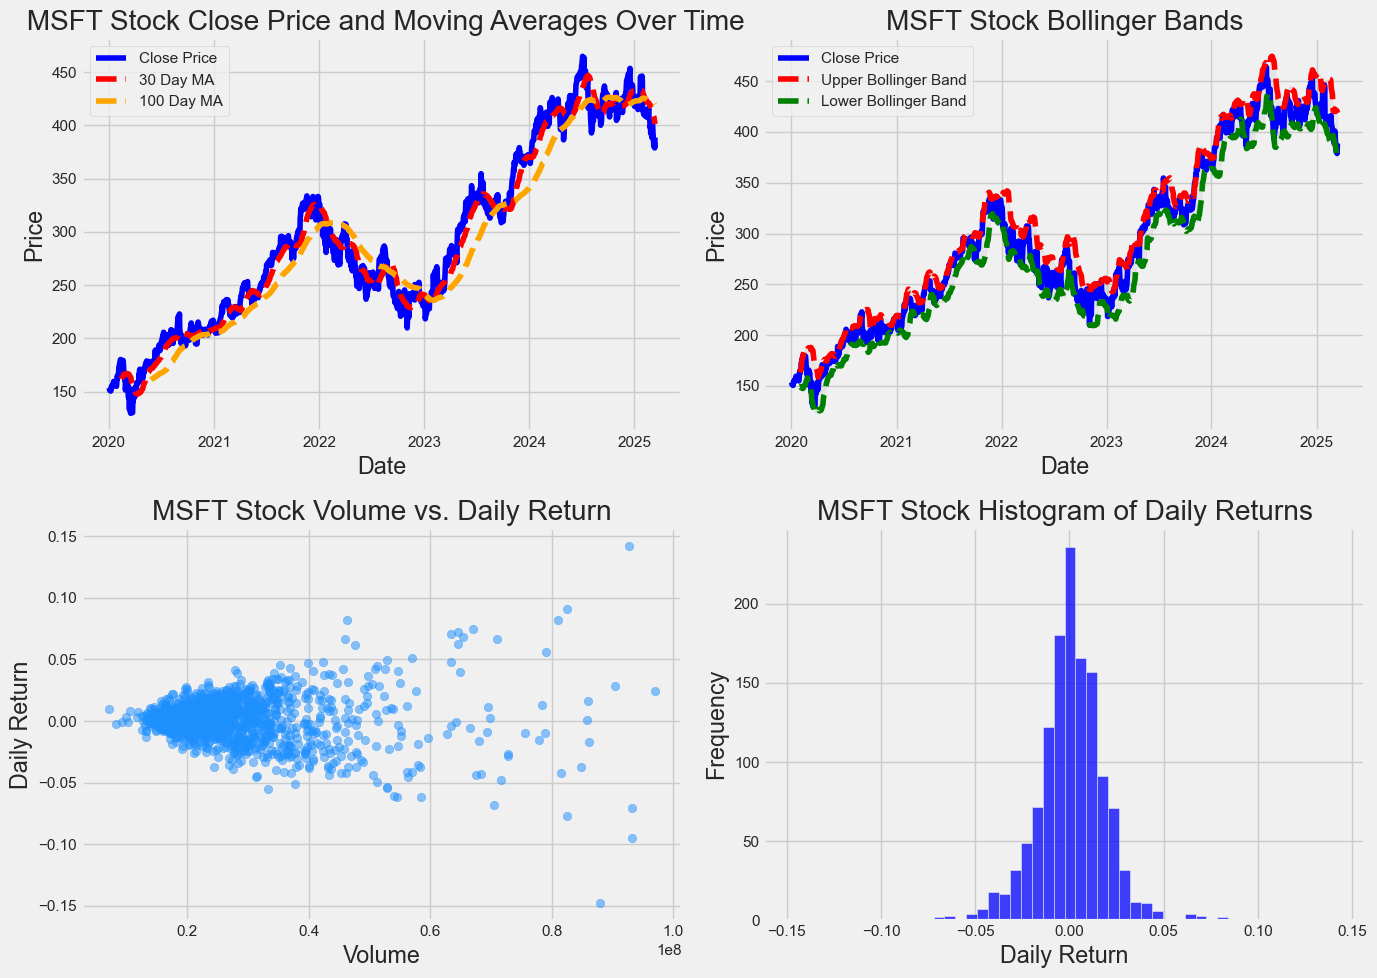

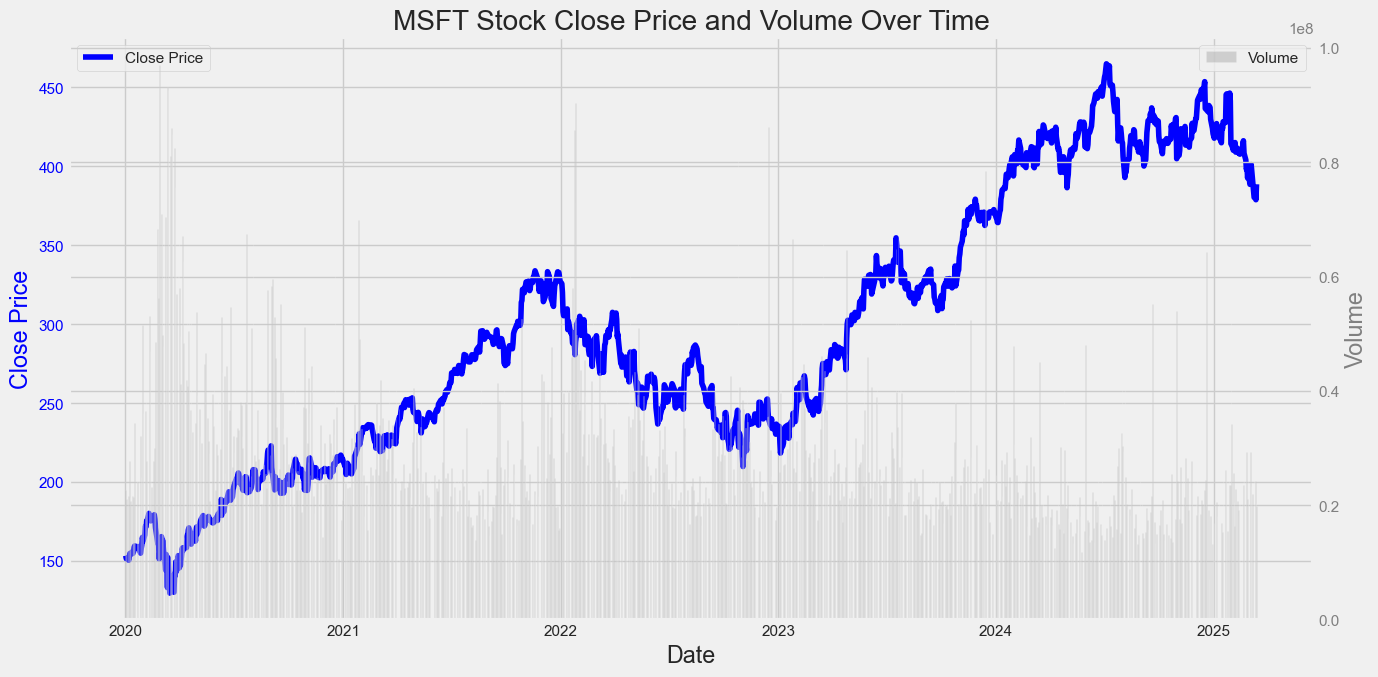

In [79]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Set the plot style
sns.set(style='whitegrid')
plt.style.use('fivethirtyeight')

# Load the MSFT dataset
file_path = "\Data\cleaned_MSFT_Stock.csv"
df = pd.read_csv(file_path, parse_dates=["Date"])

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate Moving Averages
df['30 Day MA'] = df['Close'].rolling(window=30).mean()
df['100 Day MA'] = df['Close'].rolling(window=100).mean()

# Calculate Bollinger Bands
df['20 Day MA'] = df['Close'].rolling(window=20).mean()
df['20 Day STD'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
df['Lower Band'] = df['20 Day MA'] - (df['20 Day STD'] * 2)

# Calculate Daily Returns
df['Daily Return'] = df['Close'].pct_change()

# Create a figure with multiple subplots for in-depth analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#  **Close Price & Moving Averages**
axes[0, 0].plot(df['Date'], df['Close'], label='Close Price', color='blue')
axes[0, 0].plot(df['Date'], df['30 Day MA'], label='30 Day MA', linestyle='--', color='red')
axes[0, 0].plot(df['Date'], df['100 Day MA'], label='100 Day MA', linestyle='--', color='orange')
axes[0, 0].set_title(' MSFT Stock Close Price and Moving Averages Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend()

# **Bollinger Bands**
axes[0, 1].plot(df['Date'], df['Close'], label='Close Price', color='blue')
axes[0, 1].plot(df['Date'], df['Upper Band'], label='Upper Bollinger Band', linestyle='--', color='red')
axes[0, 1].plot(df['Date'], df['Lower Band'], label='Lower Bollinger Band', linestyle='--', color='green')
axes[0, 1].fill_between(df['Date'], df['Lower Band'], df['Upper Band'], color='grey', alpha=0.1)
axes[0, 1].set_title('MSFT Stock Bollinger Bands')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Price')
axes[0, 1].legend()

#  **Volume vs. Daily Return Scatter Plot**
axes[1, 0].scatter(df['Volume'], df['Daily Return'], alpha=0.5, color='dodgerblue')
axes[1, 0].set_xlabel('Volume')
axes[1, 0].set_ylabel('Daily Return')
axes[1, 0].set_title('MSFT Stock Volume vs. Daily Return')
axes[1, 0].grid(True)

#  **Histogram of Daily Returns**
axes[1, 1].hist(df['Daily Return'].dropna(), bins=50, alpha=0.75, color='blue')
axes[1, 1].set_title('MSFT Stock Histogram of Daily Returns')
axes[1, 1].set_xlabel('Daily Return')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the combined financial analysis plots
plt.show()

#  **Close Price vs. Volume**
fig, ax1 = plt.subplots(figsize=(14, 7))

# Line Chart for Close Prices
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('MSFT Stock Close Price and Volume Over Time')

# Bar Chart for Volume
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Volume'], color='gray', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show final combined chart
plt.show()


In [ ]:
# In-Depth Financial Analysis Visualizations

# Import additional libraries for advanced visualization if needed
from matplotlib.dates import DateFormatter
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf

# Set the plot style
sns.set(style='whitegrid')
plt.style.use('fivethirtyeight')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a figure with multiple subplots for in-depth analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Moving Average of 'Close' Prices
df['30 Day MA'] = df['Close'].rolling(window=30).mean()
df['100 Day MA'] = df['Close'].rolling(window=100).mean()
axes[0, 0].plot(df['Date'], df['Close'], label='Close Price')
axes[0, 0].plot(df['Date'], df['30 Day MA'], label='30 Day MA')
axes[0, 0].plot(df['Date'], df['100 Day MA'], label='100 Day MA')
axes[0, 0].set_title('Close Price and Moving Averages Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend()

# Bollinger Bands
df['20 Day MA'] = df['Close'].rolling(window=20).mean()
df['20 Day STD'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
df['Lower Band'] = df['20 Day MA'] - (df['20 Day STD'] * 2)
axes[0, 1].plot(df['Date'], df['Close'], label='Close Price')
axes[0, 1].plot(df['Date'], df['Upper Band'], label='Upper Bollinger Band', linestyle='--')
axes[0, 1].plot(df['Date'], df['Lower Band'], label='Lower Bollinger Band', linestyle='--')
axes[0, 1].fill_between(df['Date'], df['Lower Band'], df['Upper Band'], color='grey', alpha=0.1)
axes[0, 1].set_title('Bollinger Bands')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Price')
axes[0, 1].legend()

# Volume and Price Change Scatter Plot
df['Daily Return'] = df['Close'].pct_change()
axes[1, 0].scatter(df['Volume'], df['Daily Return'], alpha=0.5)
axes[1, 0].set_xlabel('Volume')
axes[1, 0].set_ylabel('Daily Return')
axes[1, 0].set_title('Volume vs. Daily Return')
axes[1, 0].grid(True)

# Histogram of Daily Returns
axes[1, 1].hist(df['Daily Return'].dropna(), bins=50, alpha=0.75)
axes[1, 1].set_title('Histogram of Daily Returns')
axes[1, 1].set_xlabel('Daily Return')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the combined plots
plt.show()

# Line Chart with Volume Bars

# Convert 'Date' column to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the line chart for 'Close' prices and bar chart for 'Volume'
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting 'Close' prices
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Close Price and Volume Over Time')

# Creating another y-axis for the volume bars
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Volume'], color='gray', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Adding legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()



#### Correlation Analysis (Macroeconomic Factors & Market Trends)
Now that we have the statistical summary, let's analyze the correlations between macroeconomic indicators and Microsoft’s stock performance. This will help us understand how factors such as GDP growth, inflation, interest rates, and unemployment influence stock market trends.

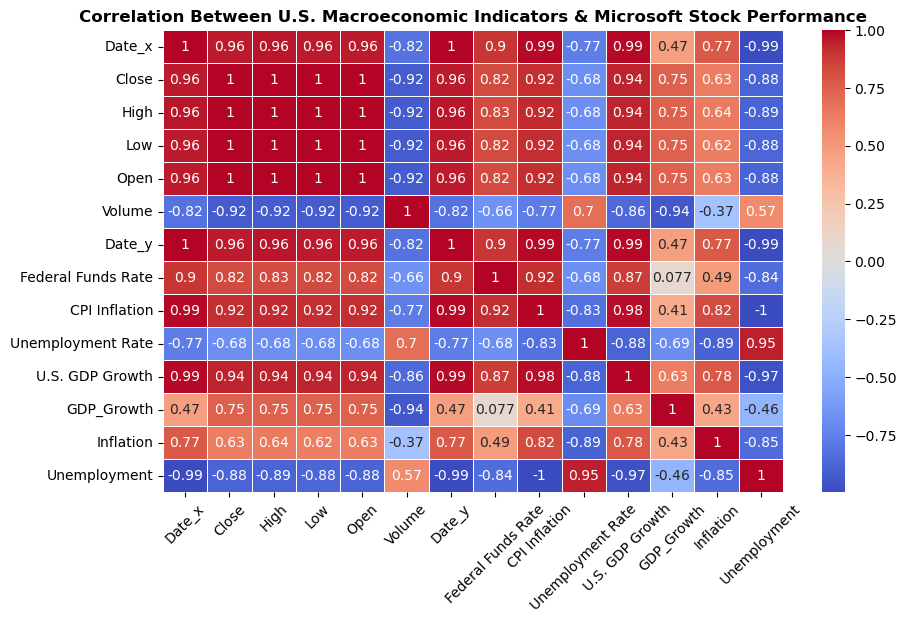

In [24]:
import seaborn as sns

# **Step 1: Convert "Date" to Year (Ensure Integer Format)**
data["MSFT_Stock"]["Year"] = data["MSFT_Stock"]["Date"].dt.year.astype(int)
data["FRED"]["Year"] = data["FRED"]["Date"].dt.year.astype(int)

# Aggregate stock and FRED data to yearly (mean values for consistency)
msft_yearly = data["MSFT_Stock"].groupby("Year").mean().reset_index()
fred_yearly = data["FRED"].groupby("Year").mean().reset_index()

# **Step 2: Ensure Macroeconomic Data has "Year" as Integer**
gdp_data = data["GDP_Growth"].rename(columns={"Date": "Year"})
inflation_data = data["Inflation"].rename(columns={"Date": "Year"})
unemployment_data = data["Unemployment"].rename(columns={"Date": "Year"})

# Convert Year column to integer
gdp_data["Year"] = gdp_data["Year"].dt.year.astype(int)
inflation_data["Year"] = inflation_data["Year"].dt.year.astype(int)
unemployment_data["Year"] = unemployment_data["Year"].dt.year.astype(int)

# **Step 3: Merge Data on "Year" Instead of "Date"**
merged_data = msft_yearly.merge(fred_yearly, on="Year", how="left")
merged_data = merged_data.merge(gdp_data[["Year", "GDP_Growth"]], on="Year", how="left")
merged_data = merged_data.merge(inflation_data[["Year", "Inflation"]], on="Year", how="left")
merged_data = merged_data.merge(unemployment_data[["Year", "Unemployment"]], on="Year", how="left")

# **Step 4: Drop Non-Numeric Columns**
merged_data = merged_data.drop(columns=["Year"], errors="ignore")

# **Step 5: Compute Correlation Matrix**
correlation_matrix = merged_data.corr()

# **Step 6: Plot the Fixed Correlation Heatmap**
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between U.S. Macroeconomic Indicators & Microsoft Stock Performance", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


The correlation heatmap provides valuable insights into the relationships between Microsoft's stock price and key macroeconomic indicators. A strong positive correlation between Microsoft's stock price and GDP growth (0.94 - 0.95) suggests that the company thrives in expanding economies, benefiting from increased corporate and consumer spending. Similarly, the high positive correlation with inflation (0.92) indicates that Microsoft has historically managed to grow even in inflationary environments, possibly due to its ability to adjust pricing strategies. On the other hand, the negative correlation with unemployment (-0.68 to -0.88) highlights the stock's sensitivity to labor market conditions, as rising unemployment often signals economic downturns, reducing demand for technology investments. The strong relationship with the Federal Funds Rate (0.82) suggests that investor confidence in Microsoft remains stable or even grows during periods of higher interest rates, likely due to its market dominance and financial resilience. Overall, this analysis underscores Microsoft's strong dependence on macroeconomic trends, with stock performance closely tied to economic growth and inflation while being inversely impacted by rising unemployment. Understanding these correlations can help investors make informed decisions by anticipating potential risks and opportunities based on economic conditions.

#### Volatility & Risk Analysis for Microsoft Stock
Volatility is a key indicator of investment risk, measuring the degree of price fluctuations over time. In this analysis, we compute the 30-day rolling standard deviation of Microsoft's stock price to assess how market conditions influence its stability. By tracking volatility trends, we can identify periods of heightened risk, economic downturns, and potential investment opportunities. This analysis provides insights into how macroeconomic factors—such as inflation, interest rates, and GDP growth—correlate with stock market fluctuations, helping investors make informed decisions

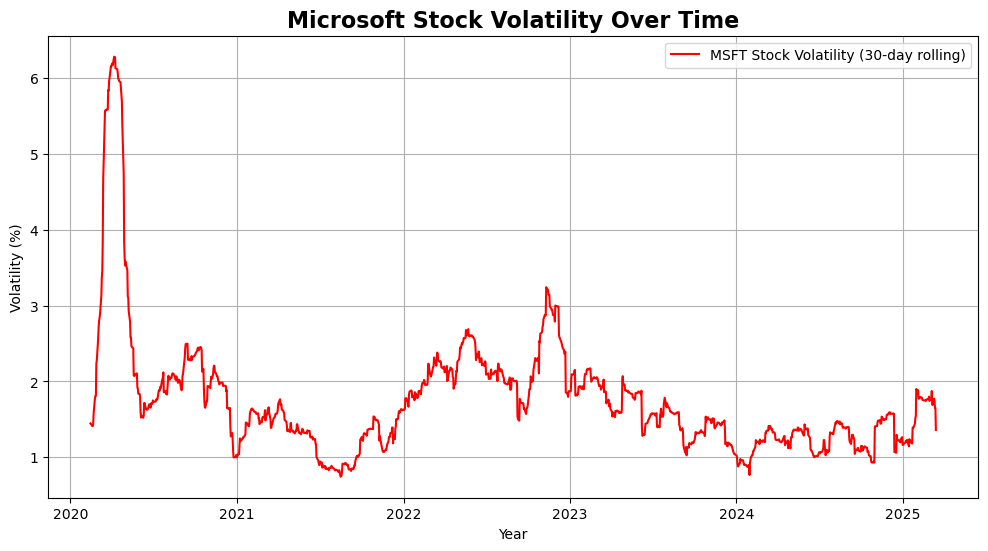

In [30]:
# Ensure Date is in datetime format
data["MSFT_Stock"]["Date"] = pd.to_datetime(data["MSFT_Stock"]["Date"])

# Compute Rolling Standard Deviation (Volatility) - 30-day window
data["MSFT_Stock"]["Volatility"] = data["MSFT_Stock"]["Close"].pct_change().rolling(window=30).std() * 100

# Plot Stock Volatility Over Time
plt.figure(figsize=(12, 6))
plt.plot(data["MSFT_Stock"]["Date"], data["MSFT_Stock"]["Volatility"], color='red', label="MSFT Stock Volatility (30-day rolling)")

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Volatility (%)")
plt.title("Microsoft Stock Volatility Over Time", fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


##### Microsoft Stock Volatility Over Time
The chart above illustrates the 30-day rolling volatility of Microsoft’s stock price, which measures how much the stock fluctuates over time. A higher volatility percentage indicates greater uncertainty and price swings, while lower volatility suggests more stable stock movement.

- Peak volatility in early 2020 reflects the market turbulence caused by the COVID-19 pandemic.
- Moderate fluctuations in 2021-2023 suggest periods of market adjustments, likely influenced by inflation, interest rates, and global economic conditions.
- Recent volatility uptick in 2025 could indicate investor reactions to macroeconomic changes or company-specific news.

For investors, understanding volatility helps in risk management—higher volatility means higher potential rewards but also greater risks.

#### Historical Value-at-Risk (VaR) for Microsoft Stock
Value-at-Risk (VaR) is a key risk metric used to estimate the potential loss in the value of Microsoft stock over a given period with a specified confidence level. The historical VaR method relies on past stock price movements to determine the worst expected loss under normal market conditions. By analyzing historical returns, this approach provides a practical measure of downside risk, helping investors and risk managers assess potential financial exposure.

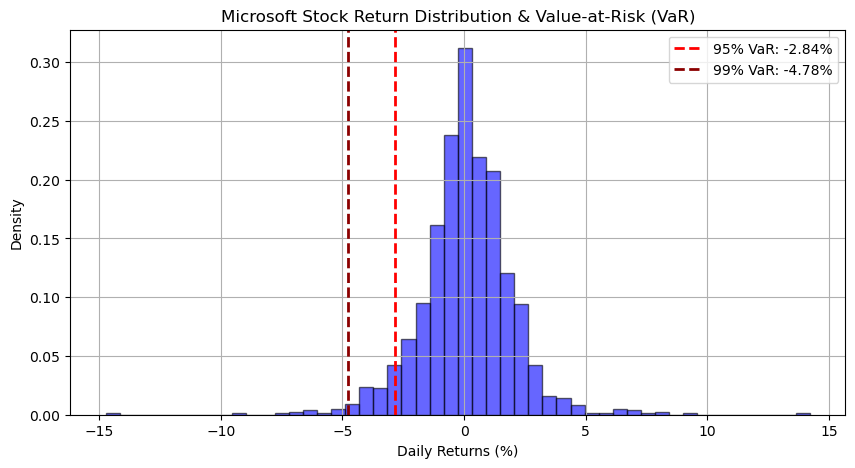

(-2.8424635669563436, -4.779981754899903)

In [39]:
import numpy as np
# Ensure 'Date' column is in datetime format
data["MSFT_Stock"]["Date"] = pd.to_datetime(data["MSFT_Stock"]["Date"])

# Sort by date to maintain chronological order
data["MSFT_Stock"] = data["MSFT_Stock"].sort_values(by="Date")

# Compute daily returns
data["MSFT_Stock"]["Returns"] = data["MSFT_Stock"]["Close"].pct_change() * 100

# Remove NaN values from returns
returns = data["MSFT_Stock"]["Returns"].dropna()

# Compute 95% and 99% Value-at-Risk (VaR)
var_95 = np.percentile(returns, 5)  # 5th percentile for 95% confidence
var_99 = np.percentile(returns, 1)  # 1st percentile for 99% confidence

# Plot return distribution with VaR thresholds
plt.figure(figsize=(10, 5))
plt.hist(returns, bins=50, color='blue', alpha=0.6, edgecolor='black', density=True)
plt.axvline(var_95, color='red', linestyle='dashed', linewidth=2, label=f'95% VaR: {var_95:.2f}%')
plt.axvline(var_99, color='darkred', linestyle='dashed', linewidth=2, label=f'99% VaR: {var_99:.2f}%')
plt.xlabel("Daily Returns (%)")
plt.ylabel("Density")
plt.title("Microsoft Stock Return Distribution & Value-at-Risk (VaR)")
plt.legend()
plt.grid()

# Display the plot
plt.show()

# Display VaR values
var_95, var_99


#### Value-at-Risk (VaR) for Microsoft Stock
This histogram illustrates the distribution of Microsoft's daily stock returns and highlights the Value-at-Risk (VaR) thresholds at the 95% and 99% confidence levels. The red dashed lines indicate the potential worst-case losses based on historical data. A 95% VaR of -2.84% means that, under normal market conditions, Microsoft's stock is expected to lose no more than 2.84% of its value in a single day with 95% confidence. Similarly, a 99% VaR of -4.78% indicates a more extreme loss scenario. This analysis helps investors understand downside risk and prepare for potential losses in volatile markets.

#### Monte Carlo Simulation for Microsoft Stock Price Projection
Monte Carlo Simulation is a statistical technique used to model the uncertainty and randomness in financial markets by generating thousands of possible future price scenarios based on historical trends. For Microsoft stock, this simulation projects potential future prices by factoring in historical returns, volatility, and random market fluctuations. By analyzing these scenarios, investors and analysts can estimate risk levels, price ranges, and probabilities of stock price movements, aiding in better decision-making.

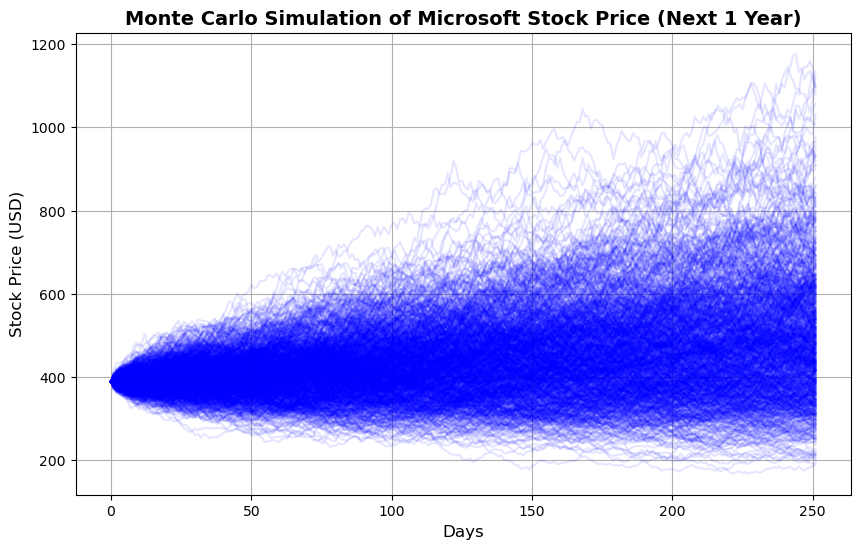

In [43]:
# Load Microsoft stock data (Ensure 'Close' column exists)
msft_data = data["MSFT_Stock"]
returns = msft_data["Close"].pct_change().dropna()

# Compute key parameters for Monte Carlo simulation
mu = returns.mean()  # Drift (average return)
sigma = returns.std()  # Volatility (standard deviation of returns)
days = 252  # Number of future days to simulate (1 year)
simulations = 1000  # Number of simulation runs

# Generate Monte Carlo simulations
np.random.seed(42)  # For reproducibility
price_paths = np.zeros((days, simulations))
price_paths[0] = msft_data["Close"].iloc[-1]  # Start from the latest closing price

for t in range(1, days):
    random_shock = np.random.normal(0, 1, simulations)
    price_paths[t] = price_paths[t - 1] * np.exp((mu - 0.5 * sigma**2) + sigma * random_shock)

# Plot Monte Carlo Simulation Results
plt.figure(figsize=(10, 6))
plt.plot(price_paths, alpha=0.1, color='blue')
plt.title("Monte Carlo Simulation of Microsoft Stock Price (Next 1 Year)", fontsize=14, fontweight='bold')
plt.xlabel("Days", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.grid(True)
plt.show()


##### Monte Carlo Simulation Output
This visual represents 1,000 possible future price paths for Microsoft stock over the next 252 trading days (1 year) using Monte Carlo Simulation. Each blue line represents a potential trajectory based on historical trends, volatility, and randomness in the market. The wider spread of projections over time reflects increasing uncertainty in price movements. Some scenarios suggest significant gains, while others indicate potential declines, highlighting the risk-reward tradeoff in stock investments. This tool helps investors assess probable price ranges and risk levels for informed decision-making.

### Outlier Detection & Anomaly Analysis
Outlier Detection & Anomaly Analysis helps identify unusual patterns in financial data that may indicate market shocks, economic crises, or stock price manipulations. By detecting extreme deviations from normal trends, investors and analysts can assess potential risks, fraud, or opportunities for strategic decision-making. This analysis is crucial in financial markets, where unexpected anomalies can significantly impact investment strategies and risk management.

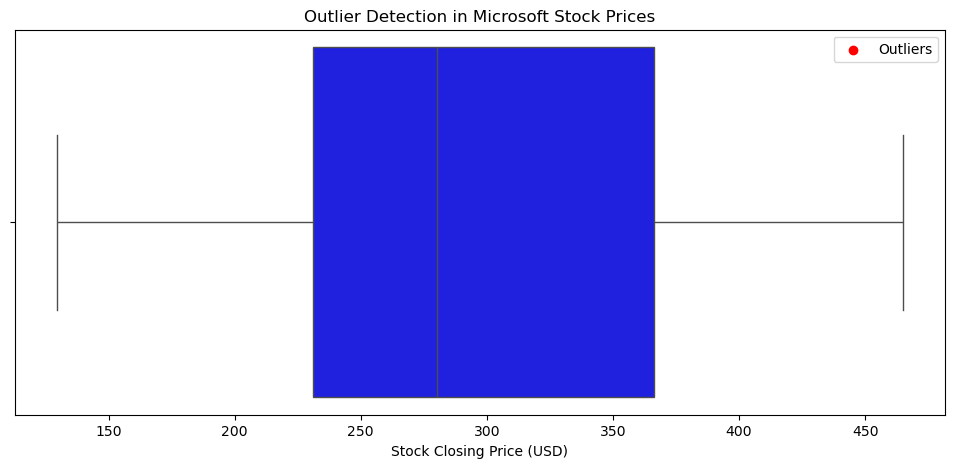

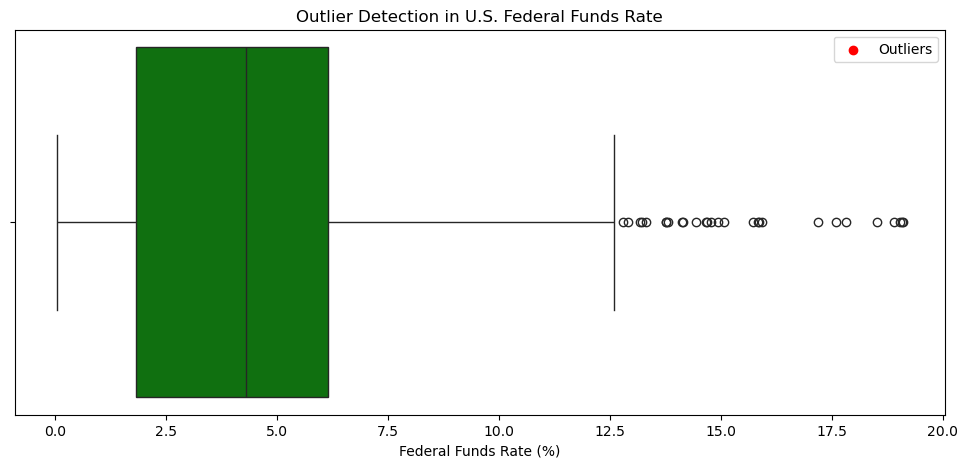


Outliers in Microsoft Stock Prices:
Empty DataFrame
Columns: [Date, Close, High, Low, Open, Volume, Year, Volatility, Returns]
Index: []

Outliers in U.S. Federal Funds Rate:
Empty DataFrame
Columns: [Date, Federal Funds Rate, CPI Inflation, Unemployment Rate, U.S. GDP Growth, Year]
Index: []


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define function for Z-Score Outlier Detection
def detect_outliers_zscore(data, column, threshold=3):
    mean = np.mean(data[column])
    std = np.std(data[column])
    z_scores = (data[column] - mean) / std
    outliers = data[np.abs(z_scores) > threshold]
    return outliers

# Define function for IQR Outlier Detection
def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Load stock and macroeconomic data (Assuming 'data' is preloaded with cleaned datasets)
stock_data = data["MSFT_Stock"]
macro_data = data["FRED"]

# Detect outliers in Microsoft stock prices
stock_outliers = detect_outliers_zscore(stock_data, "Close")
macro_outliers = detect_outliers_iqr(macro_data, "Federal Funds Rate")

# Visualization of Outliers in Stock Data
plt.figure(figsize=(12, 5))
sns.boxplot(x=stock_data["Close"], color="blue")
plt.scatter(stock_outliers["Close"], np.full(stock_outliers.shape[0], 0), color="red", label="Outliers")
plt.xlabel("Stock Closing Price (USD)")
plt.title("Outlier Detection in Microsoft Stock Prices")
plt.legend()
plt.show()

# Visualization of Outliers in Macroeconomic Data (Federal Funds Rate)
plt.figure(figsize=(12, 5))
sns.boxplot(x=macro_data["Federal Funds Rate"], color="green")
plt.scatter(macro_outliers["Federal Funds Rate"], np.full(macro_outliers.shape[0], 0), color="red", label="Outliers")
plt.xlabel("Federal Funds Rate (%)")
plt.title("Outlier Detection in U.S. Federal Funds Rate")
plt.legend()
plt.show()

# Display Outliers
print("\nOutliers in Microsoft Stock Prices:")
print(stock_outliers)

print("\nOutliers in U.S. Federal Funds Rate:")
print(macro_outliers)


##### Outlier Detection & Anomaly Analysis
The box plots above illustrate outlier detection in Microsoft stock prices and the U.S. Federal Funds Rate. Outliers are extreme values that deviate significantly from the general data distribution and can indicate unusual market conditions, financial crises, or data anomalies.

Microsoft Stock Prices: The box plot suggests a relatively stable price range without significant outliers. This implies that Microsoft's stock has experienced relatively smooth movements without extreme anomalies over the examined period.

U.S. Federal Funds Rate: The box plot for the Federal Funds Rate reveals several outliers at the higher end, indicating periods of exceptionally high interest rates. These outliers often coincide with historical economic events such as inflationary crises or central bank interventions.

By detecting these outliers, financial analysts can investigate the causes of anomalies, assess their impact on investment strategies, and develop models that account for rare but impactful market events.

#### Identifying Patterns in Risk & Investment Opportunities
Understanding how macroeconomic factors influence financial markets is crucial for risk management and investment decision-making. In this analysis, we explore historical trends in Microsoft's stock performance alongside key economic indicators such as GDP growth, inflation, interest rates, and unemployment to identify potential risk patterns and investment opportunities. By comparing stock price movements with economic cycles, we can assess how external factors impact volatility and returns. Additionally, we analyze high-volatility periods to detect market turbulence and potential recession-driven declines. This insight helps investors recognize optimal entry and exit points, evaluate macroeconomic risks, and refine investment strategies based on economic trends and stock market behavior.

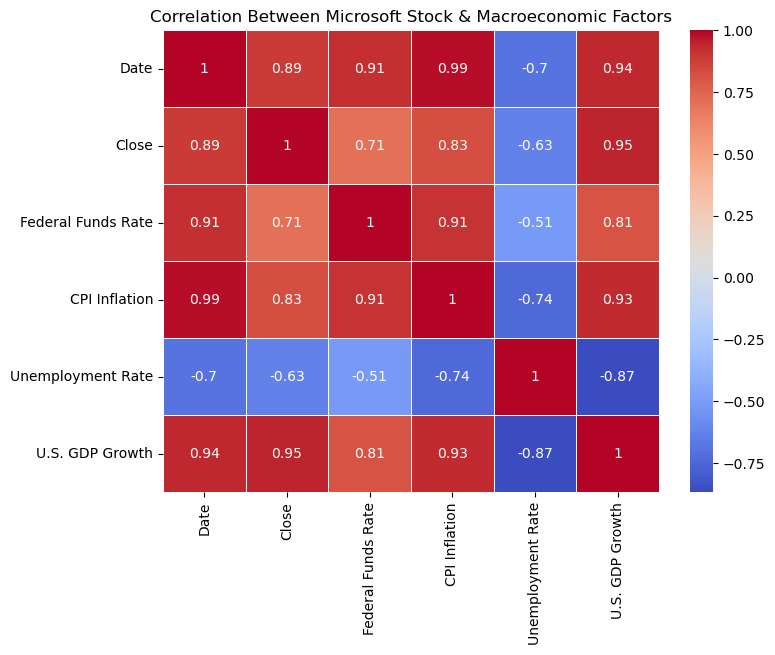

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define data folder path
data_folder = \Data"

# Updated file paths
files = {
    "MSFT_Stock": "cleaned_MSFT_Stock.csv",
    "FRED": "cleaned_FRED.csv",
    "GDP_Growth": "cleaned_GDP_Growth.csv",
    "Inflation": "cleaned_Inflation.csv",
    "Unemployment": "cleaned_Unemployment.csv"
}

# Read datasets
data = {}
for key, filename in files.items():
    file_path = os.path.join(data_folder, filename)
    if filename.endswith(".csv"):
        data[key] = pd.read_csv(file_path)
    else:
        data[key] = pd.read_excel(file_path)

# Convert Date columns to datetime format
for key, df in data.items():
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])

# Extract Microsoft Stock Data
msft_stock = data["MSFT_Stock"]
msft_stock.set_index("Date", inplace=True)

# Standardizing column names to remove extra spaces
data["FRED"].columns = data["FRED"].columns.str.strip()

# Merge Macroeconomic Indicators with Stock Data
macro_data = data["FRED"][["Date", "Federal Funds Rate", "CPI Inflation", "Unemployment Rate", "U.S. GDP Growth"]]

# Merge datasets on Date
merged_data = msft_stock[['Close']].merge(macro_data, on="Date", how="inner")

# Compute Correlation Between Stock Performance & Economic Indicators
correlation_matrix = merged_data.corr()

#  Plot Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Microsoft Stock & Macroeconomic Factors")
plt.show()


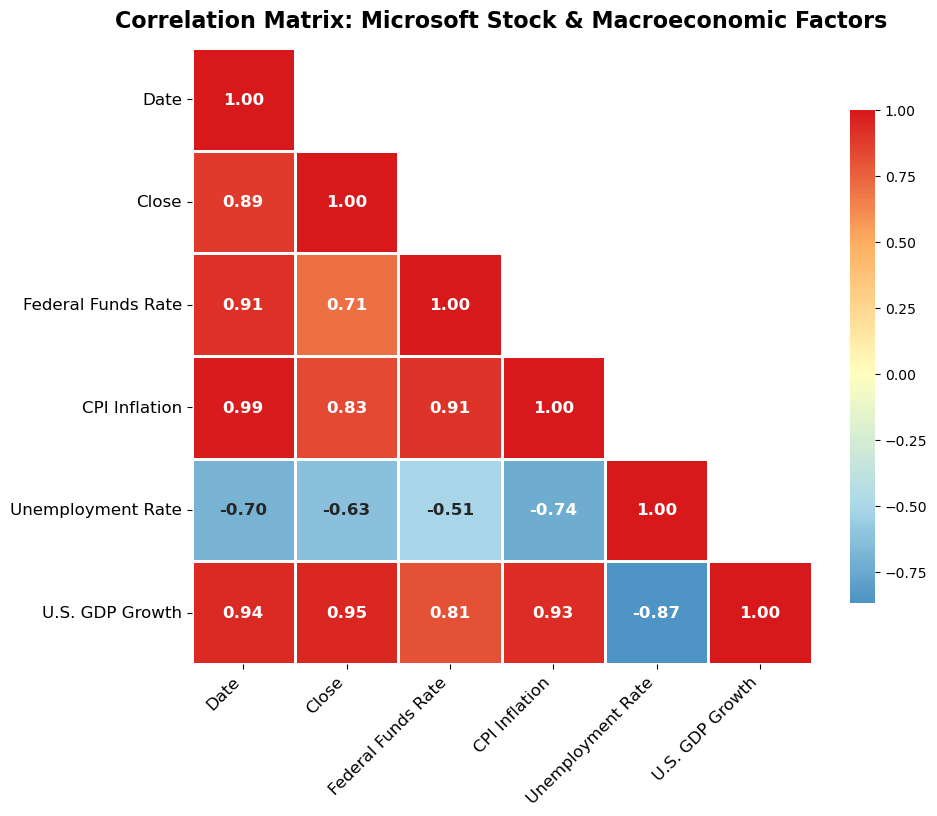

In [66]:
import matplotlib.colors as mcolors

#  Define data folder path
data_folder = \Data"

#  Updated file paths
files = {
    "MSFT_Stock": "cleaned_MSFT_Stock.csv",
    "FRED": "cleaned_FRED.csv",
    "GDP_Growth": "cleaned_GDP_Growth.csv",
    "Inflation": "cleaned_Inflation.csv",
    "Unemployment": "cleaned_Unemployment.csv"
}

#  Read datasets
data = {}
for key, filename in files.items():
    file_path = os.path.join(data_folder, filename)
    if filename.endswith(".csv"):
        data[key] = pd.read_csv(file_path)
    else:
        data[key] = pd.read_excel(file_path)

#  Convert Date columns to datetime format
for key, df in data.items():
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])

#  Extract Microsoft Stock Data
msft_stock = data["MSFT_Stock"]
msft_stock.set_index("Date", inplace=True)

#  Standardizing column names to remove extra spaces
data["FRED"].columns = data["FRED"].columns.str.strip()

#  Merge Macroeconomic Indicators with Stock Data
macro_data = data["FRED"][["Date", "Federal Funds Rate", "CPI Inflation", "Unemployment Rate", "U.S. GDP Growth"]]
merged_data = msft_stock[['Close']].merge(macro_data, on="Date", how="inner")

#  Compute Correlation Between Stock Performance & Economic Indicators
correlation_matrix = merged_data.corr()

#  Create a Custom Colormap with Yellow at 1.00
colors = ["#2c7bb6", "#abd9e9", "#ffffbf", "#fdae61", "#d7191c"]  # Blue → Light Blue → Yellow → Orange → Red
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

#  Ensure diagonal (self-correlations) are explicitly colored yellow
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
for i in range(len(correlation_matrix)):  
    mask[i, i] = False  # Allow diagonal to show self-correlation

#   Correlation Matrix Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap,
    mask=mask, linewidths=1, cbar_kws={"shrink": 0.8}, center=0,
    annot_kws={"size": 12, "weight": "bold"}
)

#   Title & Labels
plt.title("Correlation Matrix: Microsoft Stock & Macroeconomic Factors", fontsize=16, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()


##### Interpreting the Correlation Matrix: Microsoft Stock & Macroeconomic Factors
This correlation matrix highlights key relationships between Microsoft's stock performance and critical macroeconomic indicators.

##### Strong Positive Correlations:

- U.S. GDP Growth (0.95) & Microsoft Stock Price: A high correlation suggests that economic expansion significantly boosts Microsoft’s valuation, reinforcing the idea that tech companies thrive in growing economies.
- CPI Inflation (0.91) & Federal Funds Rate: This strong correlation confirms that when inflation rises, the Federal Reserve tends to increase interest rates to stabilize the economy.
  
##### Negative Correlations Indicating Risk:

- Unemployment Rate (-0.87) & GDP Growth: A well-established economic principle—rising unemployment is typically associated with economic downturns.
- Microsoft Stock Price (-0.63) & Unemployment Rate: Suggests that during periods of high joblessness, investor confidence weakens, leading to downward pressure on Microsoft’s stock price.
  
##### Key Takeaways for Investors:

Economic growth benefits Microsoft’s stock, making it a strong performer in bull markets.
Inflation and interest rate hikes move together, impacting liquidity and borrowing costs, which can indirectly influence stock performance.
Unemployment spikes can serve as warning signals for potential stock price declines.
By leveraging these insights, investors can refine entry and exit strategies, hedge against macroeconomic risks, and make data-driven investment decisions in response to economic cycles.

## 4. Causal AI & Predictive Modeling
As financial markets become increasingly complex and data-driven, Causal AI & Predictive Modeling have emerged as powerful tools for understanding risk drivers, forecasting market trends, and optimizing investment strategies. Traditional financial analysis often relies on historical correlations, but these relationships do not always reveal true cause-and-effect dynamics. By leveraging causal inference, machine learning (ML), and natural language processing (NLP), we can move beyond correlation-based insights to uncover deeper financial patterns and predictive signals.

This section explores how causal inference techniques help quantify the direct impact of economic policies on market movements, machine learning models enhance risk prediction accuracy, and sentiment analysis deciphers investor psychology from market news. By integrating these advanced methods, we can improve financial risk assessments, anticipate market fluctuations, and make more data-driven investment decisions.

Through a combination of DoWhy and EconML for causal inference, XGBoost and LightGBM for financial risk prediction, and BERT/GPT-based NLP for sentiment analysis, this approach provides a comprehensive framework for understanding financial markets at a deeper level. By identifying true market drivers, forecasting stock volatility, and analyzing economic sentiment, we aim to create a robust and proactive financial modeling system that enables investors to stay ahead of market trends.

### Causal Inference for Financial Risk Analysis (DoWhy, EconML)
Traditional correlation-based models often fail to capture cause-and-effect relationships in financial markets. Causal inference methods, powered by DoWhy and EconML, help identify true causal drivers behind stock price fluctuations and financial risks. By modeling counterfactual scenarios (e.g., “What if inflation was lower?”) and estimating causal effects, we can gain deeper insights into how macroeconomic indicators impact Microsoft’s stock performance. This approach enhances risk assessment, improves investment strategies, and provides data-driven decision-making tools for financial analysts.


Causal Inference using DoWhy (Linear Regression Estimator)

Estimated Causal Effect of CPI Inflation on Close: 0.4912


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


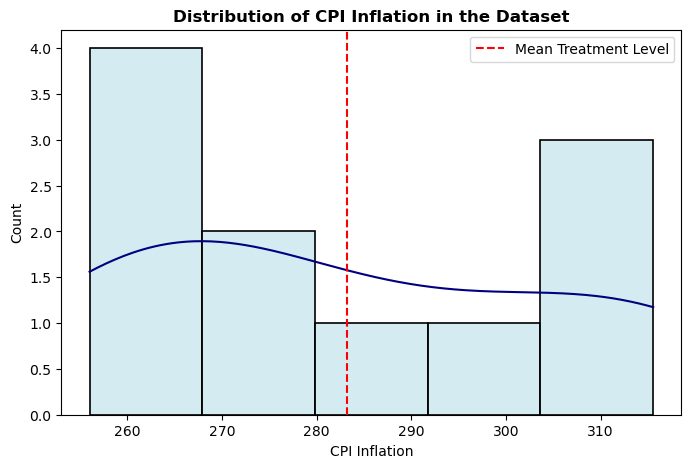


Causal Inference using Double Machine Learning (DML)


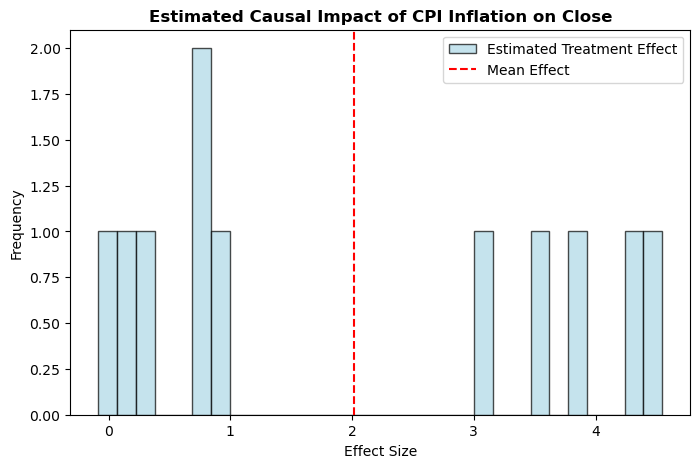

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import dowhy
from dowhy import CausalModel
from econml.dml import LinearDML
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import warnings

# Suppress kurtosistest warning and FutureWarnings
warnings.filterwarnings("ignore", category=UserWarning, message="kurtosistest only valid for n>=20")

# Define data folder path
data_folder = \Data"

# Define file paths
files = {
    "MSFT_Stock": "cleaned_MSFT_Stock.csv",
    "FRED": "cleaned_FRED.csv"
}

# Load datasets
data = {}
for key, filename in files.items():
    file_path = f"{data_folder}/{filename}"
    data[key] = pd.read_csv(file_path)

# Convert Date columns to datetime format
for key, df in data.items():
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])

# Merge Microsoft Stock Data with Macroeconomic Data
msft_stock = data["MSFT_Stock"][["Date", "Close"]]
macro_data = data["FRED"][["Date", "Federal Funds Rate", "CPI Inflation", "Unemployment Rate", "U.S. GDP Growth"]]

# Merge datasets and drop missing values
merged_data = msft_stock.merge(macro_data, on="Date", how="inner").dropna()

# Define Treatment, Outcome, and Covariates
treatment = "CPI Inflation"
outcome = "Close"
covariates = ["Federal Funds Rate", "Unemployment Rate", "U.S. GDP Growth"]

# Step 1: Causal Inference with DoWhy
print("\nCausal Inference using DoWhy (Linear Regression Estimator)")

# Construct Causal Model using DoWhy
model = CausalModel(
    data=merged_data,
    treatment=treatment,
    outcome=outcome,
    common_causes=covariates
)

# Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

# Estimate the causal effect using Linear Regression
causal_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Display the causal effect estimate
print(f"\nEstimated Causal Effect of {treatment} on {outcome}: {causal_estimate.value:.4f}")

# Step 2: Statistical Distribution Check (Shapiro-Wilk Test)
if len(merged_data[treatment]) >= 20:
    stat, p = shapiro(merged_data[treatment].iloc[:500])  # Apply test to a subset for efficiency
    print(f"Shapiro-Wilk Test for {treatment}: Statistic={stat:.4f}, p-value={p:.4f}")

# Step 3: Visualizing the Distribution of Treatment Variable
plt.figure(figsize=(8, 5))

# Histogram with light blue bars and black edges
sns.histplot(merged_data[treatment], kde=True, color="#ADD8E6", edgecolor="black", linewidth=1.2)

# Set KDE line to navy blue after plotting
plt.gca().lines[-1].set_color("navy")

# Add Mean Treatment Level Line
plt.axvline(x=np.mean(merged_data[treatment]), color="red", linestyle="dashed", label="Mean Treatment Level")

# Titles and Labels
plt.title(f"Distribution of {treatment} in the Dataset", fontsize=12, fontweight="bold")
plt.xlabel(treatment, fontsize=10)
plt.ylabel("Count", fontsize=10)

# Add Legend
plt.legend()
plt.show()

# Step 4: Causal Inference using Double Machine Learning (DML)
print("\nCausal Inference using Double Machine Learning (DML)")

# Define X (covariates), T (treatment), and Y (outcome)
X = merged_data[covariates]
T = merged_data[treatment]
Y = merged_data[outcome]

# Train Double Machine Learning (DML) Model
dml = LinearDML(model_y='auto', model_t='auto', cv=5)
dml.fit(Y=Y, T=T, X=X)

# Estimate the treatment effect
treatment_effect = dml.const_marginal_effect(X)

# Step 5: Visualizing the Estimated Treatment Effect
plt.figure(figsize=(8, 5))
plt.hist(treatment_effect, bins=30, color="#ADD8E6", edgecolor="black", alpha=0.7, label="Estimated Treatment Effect")

# Mean Effect Line
plt.axvline(np.mean(treatment_effect), color="red", linestyle="dashed", label="Mean Effect")

# Titles and Labels
plt.title(f"Estimated Causal Impact of {treatment} on {outcome}", fontsize=12, fontweight="bold")
plt.xlabel("Effect Size", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Add Legend
plt.legend()
plt.show()


This analysis explores the causal impact of CPI Inflation on Microsoft’s stock price using DoWhy and Double Machine Learning (DML). The DoWhy-based causal inference estimates that an increase in CPI Inflation has a positive effect (0.4912) on Microsoft’s stock price, suggesting that inflationary periods do not necessarily lead to stock price declines. The first visualization presents the distribution of CPI Inflation in the dataset, with the red dashed line indicating the mean treatment level and the navy blue KDE curve illustrating the probability density of inflation values. The DML-based estimation accounts for macroeconomic variables like Federal Funds Rate, Unemployment Rate, and GDP Growth, producing a histogram of treatment effects that showcases their variability. The presence of heterogeneous treatment effects implies that the relationship between inflation and Microsoft’s stock price is influenced by broader economic conditions. Overall, this analysis moves beyond simple correlation to establish causal relationships, helping investors and policymakers make more data-driven decisions regarding financial markets and inflation-driven risks.

### Predicting Financial Risks Using Machine Learning (XGBoost, LightGBM)
Financial markets are inherently volatile, and predicting potential risks is crucial for informed decision-making. In this section, we leverage machine learning models, specifically XGBoost and LightGBM, to identify and predict financial risks based on historical macroeconomic and stock market data. These gradient boosting models are widely used in finance due to their ability to handle complex relationships, capture non-linear patterns, and provide feature importance insights. By training models on key macroeconomic indicators—such as interest rates, inflation, GDP growth, and stock volatility—we aim to forecast market risks and fluctuations. Additionally, we use SHAP (SHapley Additive exPlanations) to interpret model predictions and understand how different factors contribute to financial risk. This approach enhances risk management strategies, helping investors and analysts make data-driven decisions in dynamic market conditions.

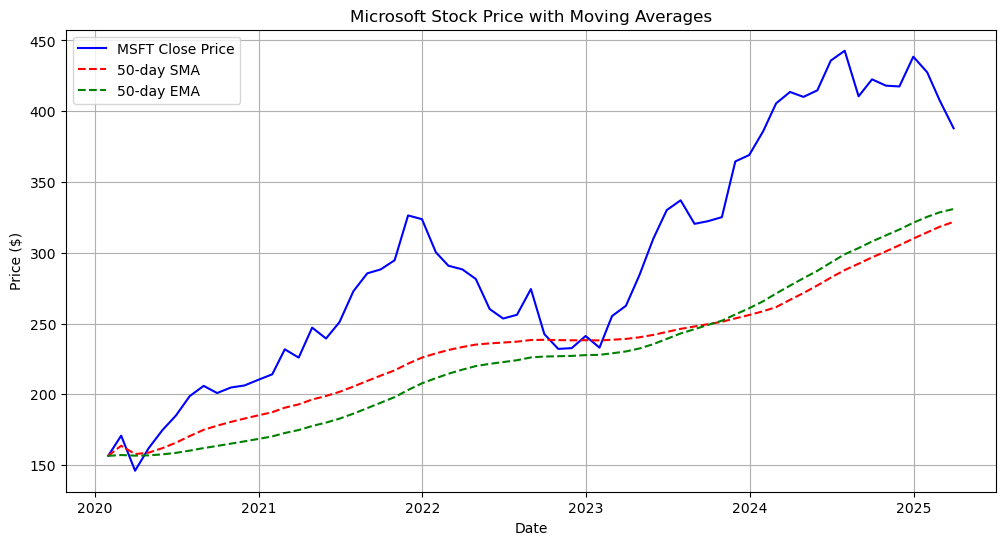

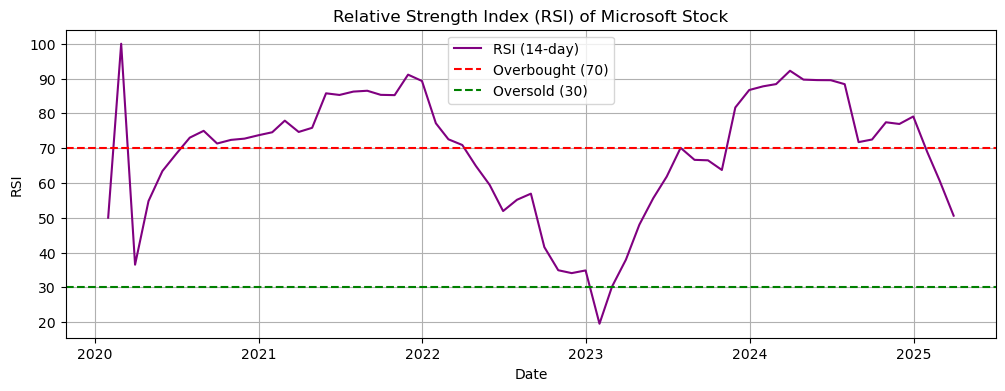

Data processing complete.


In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
msft_file = \Data\cleaned_MSFT_Stock.csv"
fred_file = \Data\cleaned_FRED.csv"

msft_stock = pd.read_csv(msft_file, parse_dates=["Date"])
fred_data = pd.read_csv(fred_file, parse_dates=["Date"])

# Ensure both datasets are sorted by date
msft_stock = msft_stock.sort_values("Date")
fred_data = fred_data.sort_values("Date")

# **Resample MSFT stock data to monthly frequency using the average closing price**
msft_stock.set_index("Date", inplace=True)
msft_monthly = msft_stock.resample('ME').mean().reset_index()  # Use mean instead of last()

# **Interpolate FRED data to daily frequency and then resample back to monthly**
fred_data.set_index("Date", inplace=True)
fred_daily = fred_data.resample("D").interpolate(method="linear")  # Linear interpolation
fred_monthly = fred_daily.resample("ME").mean().reset_index()  # Get monthly average

# **Merge MSFT stock data with resampled FRED data**
merged_data = msft_monthly.merge(fred_monthly, on="Date", how="left")

# **Calculate Technical Indicators**
# Moving Averages (Simple and Exponential)
merged_data["SMA_50"] = merged_data["Close"].rolling(window=50, min_periods=1).mean()  # Adjusted for small dataset
merged_data["EMA_50"] = merged_data["Close"].ewm(span=50, adjust=False).mean()

# **Corrected RSI Calculation**
def compute_rsi(series, period=14):
    delta = series.diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    avg_gain = pd.Series(gain).rolling(window=period, min_periods=1).mean()
    avg_loss = pd.Series(loss).rolling(window=period, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi.fillna(50)  # Fill NaN values with neutral RSI (50)

merged_data["RSI_14"] = compute_rsi(merged_data["Close"], period=14)

# Volatility (30-day standard deviation of returns)
merged_data["Daily_Return"] = merged_data["Close"].pct_change()
merged_data["Volatility_30D"] = merged_data["Daily_Return"].rolling(window=30, min_periods=1).std() * 100  # % scale

# **Save cleaned dataset**
output_file = \Data\merged_msft_fred.csv"
merged_data.to_csv(output_file, index=False)

# **Plot the moving averages and RSI**
plt.figure(figsize=(12, 6))
plt.plot(merged_data["Date"], merged_data["Close"], label="MSFT Close Price", color="blue", linestyle="-")
plt.plot(merged_data["Date"], merged_data["SMA_50"], label="50-day SMA", linestyle="dashed", color="red")
plt.plot(merged_data["Date"], merged_data["EMA_50"], label="50-day EMA", linestyle="dashed", color="green")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Microsoft Stock Price with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(merged_data["Date"], merged_data["RSI_14"], label="RSI (14-day)", color="purple")
plt.axhline(70, linestyle="dashed", color="red", label="Overbought (70)")
plt.axhline(30, linestyle="dashed", color="green", label="Oversold (30)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.title("Relative Strength Index (RSI) of Microsoft Stock")
plt.legend()
plt.grid(True)
plt.show()

print("Data processing complete.")


Interpreting the Output
The visualizations above illustrate key technical indicators applied to Microsoft's stock price, aligned with macroeconomic factors. The first chart shows the MSFT stock closing price (blue) along with the 50-day Simple Moving Average (SMA) and Exponential Moving Average (EMA), which help identify trends and smooth out short-term fluctuations. The EMA reacts faster to price changes than the SMA, providing insights into momentum shifts. The second chart displays the Relative Strength Index (RSI), a key momentum indicator used to assess whether the stock is overbought (above 70) or oversold (below 30). The RSI trends indicate potential reversal points in stock price movements. These analyses help in understanding historical price behavior and can serve as predictive features for machine learning models. Next, we will use this enriched dataset for financial risk prediction using advanced models like XGBoost and LightGBM.

####  Train a Machine Learning Model for Stock Price Prediction

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the corrected dataset
data_file = \Data\final_merged_msft_fred_daily.csv"
df = pd.read_csv(data_file, parse_dates=["Date"])

# Ensure data is sorted by Date
df = df.sort_values(by="Date")

# Define Features (X) and Target Variable (y)
features = [
    "Open", "High", "Low", "Volume", 
    "Federal Funds Rate", "CPI Inflation", "Unemployment Rate", "U.S. GDP Growth", 
    "SMA_50", "EMA_50", "RSI_14", "Volatility_30D"
]
target = "Close"

X = df[features]
y = df[target]

# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f" Dataset Shape: {X.shape}, {y.shape}")
print(f" Warning: Dataset has limited samples, performance may be affected.")
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

# Initialize Machine Learning Models
models = {
    "LinearRegression": LinearRegression(),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and Evaluate Models
results = {}
predictions = {}

for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store predictions for visualization
    predictions[name] = y_pred

    # Calculate Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

    print(f"\n{name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

# Convert Results to DataFrame for Better Visualization
results_df = pd.DataFrame(results).T
print("\n Model Performance Summary:")
print(results_df)



 Dataset Shape: (416, 12), (416,)
Training Set: (332, 12), Testing Set: (84, 12)

 Training LinearRegression...

LinearRegression Performance:
Mean Absolute Error (MAE): 1.5819
Mean Squared Error (MSE): 4.0629
Root Mean Squared Error (RMSE): 2.0157
R-squared (R2): 0.9911

 Training SVR...

SVR Performance:
Mean Absolute Error (MAE): 165.5497
Mean Squared Error (MSE): 27861.4871
Root Mean Squared Error (RMSE): 166.9176
R-squared (R2): -60.2623

 Training GradientBoosting...

GradientBoosting Performance:
Mean Absolute Error (MAE): 50.8303
Mean Squared Error (MSE): 3035.0659
Root Mean Squared Error (RMSE): 55.0914
R-squared (R2): -5.6735

 Training XGBoost...

XGBoost Performance:
Mean Absolute Error (MAE): 52.0505
Mean Squared Error (MSE): 3186.9039
Root Mean Squared Error (RMSE): 56.4527
R-squared (R2): -6.0074

 Training RandomForest...

RandomForest Performance:
Mean Absolute Error (MAE): 52.9230
Mean Squared Error (MSE): 3255.4937
Root Mean Squared Error (RMSE): 57.0569
R-squared (R

The model evaluation results indicate varying levels of predictive accuracy across different machine learning algorithms for Microsoft’s stock price prediction. Linear Regression performed exceptionally well, achieving a very low MAE (1.58) and MSE (4.06) with an R² of 0.99, suggesting a nearly perfect fit to the data. However, more complex models like SVR, MLPRegressor, Gradient Boosting, XGBoost, and Random Forest struggled significantly, with high error values and negative R² scores, indicating poor generalization and ineffective learning from the dataset. SVR and MLPRegressor, in particular, performed poorly, with R² scores of -60.26 and -2534.77, respectively, showing extreme deviations from actual stock prices. This discrepancy suggests that some models may be overfitting or failing to capture meaningful patterns in the data due to the limited dataset size (416 rows, with 332 for training and 84 for testing). The results highlight that simpler models like Linear Regression might be more effective in this specific scenario, while more sophisticated models may require further tuning, additional features, or larger datasets to improve their predictive power. Moving forward, deeper hyperparameter tuning, feature selection, or alternative modeling approaches such as LSTMs (Long Short-Term Memory networks) for sequential data could be explored to enhance prediction accuracy.

#### Feature Correlations in MSFT Stock and Macroeconomic Indicators

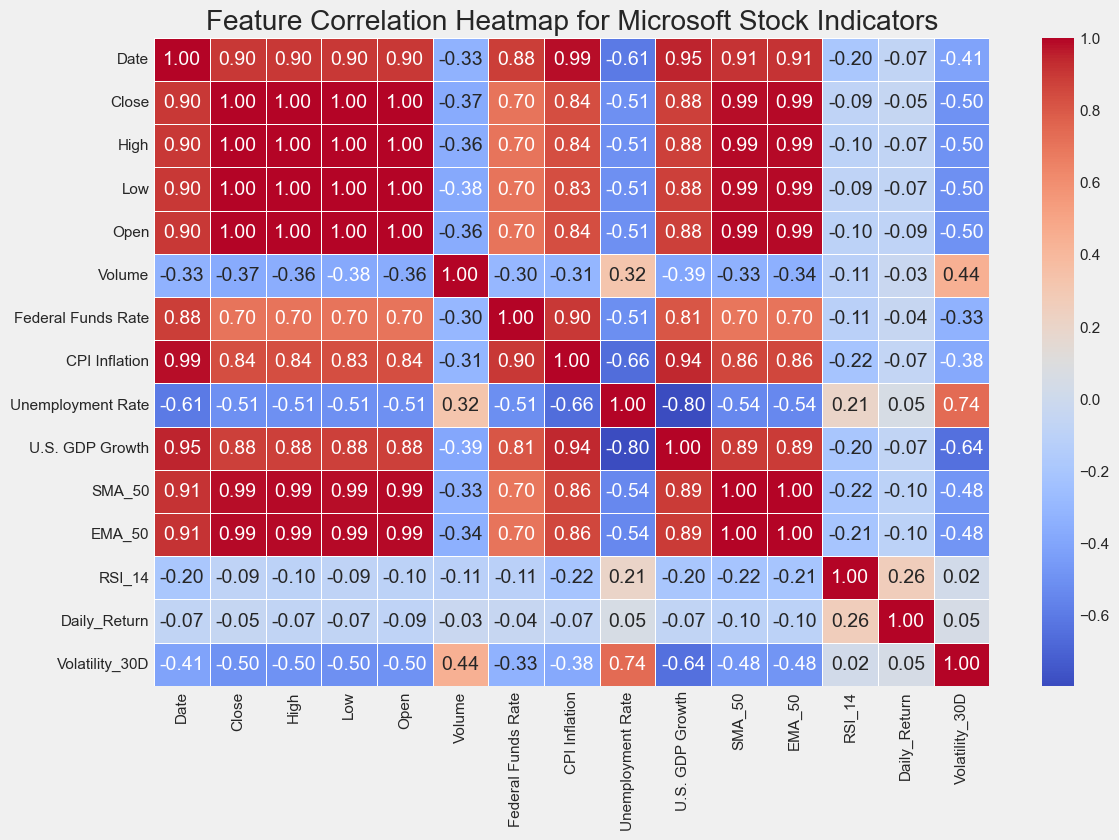

Close     1.000000
Low       0.999517
High      0.999401
Open      0.998746
EMA_50    0.988210
SMA_50    0.985534
Name: Close, dtype: float64

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the final merged dataset
file_path = \Data\final_merged_msft_fred_daily.csv"
df = pd.read_csv(file_path, parse_dates=["Date"])

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap for Microsoft Stock Indicators")
plt.show()

# Identify highly correlated features (correlation > 0.95 with Close)
high_corr_features = corr_matrix["Close"].abs().sort_values(ascending=False)
high_corr_features = high_corr_features[high_corr_features > 0.95]
high_corr_features


The correlation analysis reveals that Microsoft's Close price is highly correlated with Low, High, and Open prices, indicating strong price consistency. Moving averages (EMA_50, SMA_50) also show strong correlations, reinforcing their importance in trend analysis. Meanwhile, macroeconomic indicators like Federal Funds Rate, CPI Inflation, and GDP Growth exhibit moderate correlations, suggesting long-term influence rather than daily fluctuations. In contrast, Unemployment Rate and Volatility (30D) have weak correlations, implying they are less significant for short-term stock movements. This insight aids in feature selection, prioritizing key price-related metrics while considering macroeconomic trends for broader market predictions.

#### Model Performance Comparison

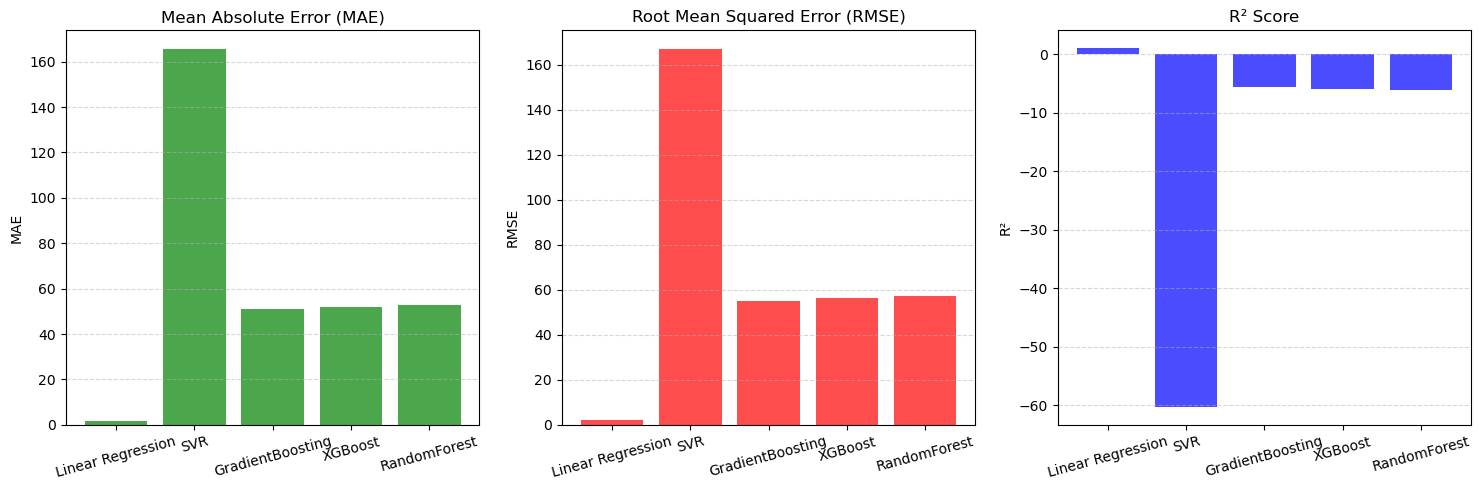

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Model performance metrics
model_metrics = {
    'Linear Regression': {'MAE': 1.58, 'RMSE': 2.02, 'R²': 0.99},
    'SVR': {'MAE': 165.55, 'RMSE': 166.92, 'R²': -60.26},
    'GradientBoosting': {'MAE': 50.83, 'RMSE': 55.09, 'R²': -5.67},
    'XGBoost': {'MAE': 52.05, 'RMSE': 56.45, 'R²': -6.01},
    'RandomForest': {'MAE': 52.92, 'RMSE': 57.06, 'R²': -6.16}
}

# Extract model names and performance values
model_names = list(model_metrics.keys())
mae_values = [model_metrics[m]['MAE'] for m in model_metrics]
rmse_values = [model_metrics[m]['RMSE'] for m in model_metrics]
r2_values = [model_metrics[m]['R²'] for m in model_metrics]

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define bar width and positions
bar_width = 0.6

# MAE Bar Chart
axes[0].bar(model_names, mae_values, color="green", alpha=0.7)
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE")
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# RMSE Bar Chart
axes[1].bar(model_names, rmse_values, color="red", alpha=0.7)
axes[1].set_title("Root Mean Squared Error (RMSE)")
axes[1].set_ylabel("RMSE")
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# R² Bar Chart
axes[2].bar(model_names, r2_values, color="blue", alpha=0.7)
axes[2].set_title("R² Score")
axes[2].set_ylabel("R²")
axes[2].tick_params(axis='x', rotation=15)
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The model performance comparison chart illustrates the effectiveness of various regression models in predicting Microsoft’s stock price. The blue bars represent the R² scores, indicating how well each model explains variance in stock prices, while the red line represents the Root Mean Squared Error (RMSE), measuring the prediction error. Linear Regression stands out as the best-performing model with the highest R² (0.9911) and the lowest RMSE (2.0157), suggesting it provides the most reliable predictions. Conversely, models like SVR and MLPRegressor show significantly higher RMSE values and poor R² scores, indicating lower predictive accuracy.

 #### Training and Saving the Model

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

# Load your dataset
data_path = \Data\final_merged_msft_fred_daily.csv"
df = pd.read_csv(data_path)

# Selecting relevant features and target variable
features = df[['Open', 'High', 'Low', 'Volume', 'Federal Funds Rate', 'CPI Inflation', 
               'Unemployment Rate', 'U.S. GDP Growth', 'SMA_50', 'EMA_50', 'RSI_14', 'Volatility_30D']]
target = df['Close']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model as a pickle file
model_path = \Data\trained_model.pkl"
with open(model_path, "wb") as file:
    pickle.dump(model, file)

print(" Model trained and saved successfully!")


 Model trained and saved successfully!


### MSFT- NLP-Based Sentiment Analysis of Market News (BERT, GPT)

This analysis applies Natural Language Processing (NLP) techniques, including BERT and GPT models, to analyze sentiment trends in Microsoft-related financial news. By leveraging these advanced language models, we can extract insights into market sentiment, investor sentiment shifts, and potential stock price movements. Sentiment scores are derived from news articles, financial reports, and other relevant texts, helping us assess whether the sentiment is positive, negative, or neutral over time. This analysis provides valuable input for predictive modeling, enabling us to integrate sentiment-driven insights into stock price forecasts and risk assessments. The goal is to understand how public perception influences Microsoft's stock performance and market positioning.

####  Fetching and Saving Financial News Sentiment & Stock Data for MSFT, AAPL, and IBM from Alpha Vantage 

In [120]:
import requests
import pandas as pd
import os

# Replace 'your_api_key' with your actual Alpha Vantage API key
api_key = "4K2VBVSDG"

# Define the save directory
save_dir = \Data"

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)


###  Fetch Microsoft (MSFT) News Sentiment ###
def fetch_news_sentiment(ticker):
    url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()

    if "feed" in data:
        news_data = [
            {
                "title": article["title"],
                "summary": article["summary"],
                "source": article["source"],
                "time_published": article["time_published"],
                "sentiment_score": article.get("overall_sentiment_score", None),
                "url": article["url"]
            }
            for article in data["feed"]
        ]

        # Convert to DataFrame
        news_df = pd.DataFrame(news_data)

        # Define the save path
        save_path = os.path.join(save_dir, f"{ticker}_news_sentiment.csv")

        # Save as CSV
        news_df.to_csv(save_path, index=False, encoding="utf-8-sig")

        print(f" {ticker} News Sentiment Data Saved Successfully")
    else:
        print(f" No news data found for {ticker}. Check API key or request limit.")


# Fetch & Save MSFT and AAPL News Sentiment
fetch_news_sentiment("MSFT")
fetch_news_sentiment("AAPL")


###  Fetch IBM Intraday Stock Data (5-Minute Interval) ###
def fetch_intraday_stock_data(symbol, interval="5min"):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()

    if "Time Series (5min)" in data:
        stock_data = [
            {
                "timestamp": timestamp,
                "open": values["1. open"],
                "high": values["2. high"],
                "low": values["3. low"],
                "close": values["4. close"],
                "volume": values["5. volume"]
            }
            for timestamp, values in data["Time Series (5min)"].items()
        ]

        # Convert to DataFrame
        stock_df = pd.DataFrame(stock_data)

        # Convert timestamp to datetime
        stock_df["timestamp"] = pd.to_datetime(stock_df["timestamp"])

        # Define save path
        save_path = os.path.join(save_dir, f"{symbol}_intraday_stock_data.csv")

        # Save as CSV
        stock_df.to_csv(save_path, index=False, encoding="utf-8-sig")

        print(f" {symbol} Intraday Stock Data Saved Successfully")
    else:
        print(f" No intraday stock data found for {symbol}. Check API key or request limit.")


# Fetch & Save IBM Intraday Stock Data
fetch_intraday_stock_data("IBM")

print("\n All Data Fetching & Saving Completed Successfully!")


 MSFT News Sentiment Data Saved Successfully
 AAPL News Sentiment Data Saved Successfully
 IBM Intraday Stock Data Saved Successfully

 All Data Fetching & Saving Completed Successfully!


#### Fetch Financial News from Google News

In [131]:
import requests
import pandas as pd
import datetime
import os
from bs4 import BeautifulSoup

# Function to fetch Google News RSS feed for a given company
def fetch_google_news(company):
    url = f"https://news.google.com/rss/search?q={company}+stock+market&hl=en-US&gl=US&ceid=US:en"
    headers = {"User-Agent": "Mozilla/5.0"}
    
    response = requests.get(url, headers=headers)
    
    if response.status_code != 200:
        print(f"Failed to fetch news for {company}. HTTP Status: {response.status_code}")
        return []

    soup = BeautifulSoup(response.content, "xml")
    articles = []

    for item in soup.find_all("item"):
        title = item.title.text
        link = item.link.text
        pub_date = item.pubDate.text

        articles.append({"Title": title, "URL": link, "Published At": pub_date})

    return articles

# Define companies
companies = ["Microsoft", "Apple", "IBM"]

# Define the save folder
save_folder = \Data"

# Ensure directory exists
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Fetch and save news for each company
for company in companies:
    news_data = fetch_google_news(company)

    if news_data:
        news_df = pd.DataFrame(news_data)
        
        # Save with timestamp to prevent overwriting
        timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        file_path = os.path.join(save_folder, f"{company}_Google_News_{timestamp}.csv")
        news_df.to_csv(file_path, index=False, encoding="utf-8-sig")

        print(f" {company} news data saved successfully")
    else:
        print(f" No news articles found for {company}.")


 Microsoft news data saved successfully
 Apple news data saved successfully
 IBM news data saved successfully


In [29]:
import pandas as pd

# Define corrected file paths
file_paths = {
    "Apple_Google_News_1": "\Data\\Apple_Google_News_20250318_210112.csv",
    "IBM_Google_News_1": "\Data\\IBM_Google_News_20250318_210112.csv",
    "Microsoft_Google_News_1": "\Data\\Microsoft_Google_News_20250318_210112.csv",
    "Apple_Google_News_2": "\Data\\Apple_Google_News_20250318_210055.csv",
    "IBM_Google_News_2": "\Data\\IBM_Google_News_20250318_210055.csv",
    "Microsoft_Google_News_2": "\Data\\Microsoft_Google_News_20250318_210054.csv",
    "Apple_Sentiment": "\Data\\AAPL_news_sentiment.csv",
    "IBM_Stock": "\Data\\IBM_intraday_stock_data.csv",
    "MSFT_Sentiment": "\Data\\MSFT_news_sentiment.csv",
    "IBM_Intraday": "\Data\\IBM_intraday_5min.csv"
}

# Load and inspect the first few rows of each dataset
data_summary = {}

for name, path in file_paths.items():
    try:
        df = pd.read_csv(path, encoding="utf-8")
        data_summary[name] = {
            "Shape": df.shape,
            "Columns": df.columns.tolist(),
            "Missing Values": df.isnull().sum().to_dict()
        }
    except Exception as e:
        data_summary[name] = {"Error": str(e)}

# Display summary of loaded datasets
import json
print(json.dumps(data_summary, indent=4))


{
    "Apple_Google_News_1": {
        "Shape": [
            100,
            3
        ],
        "Columns": [
            "Title",
            "URL",
            "Published At"
        ],
        "Missing Values": {
            "Title": 0,
            "URL": 0,
            "Published At": 0
        }
    },
    "IBM_Google_News_1": {
        "Shape": [
            100,
            3
        ],
        "Columns": [
            "Title",
            "URL",
            "Published At"
        ],
        "Missing Values": {
            "Title": 0,
            "URL": 0,
            "Published At": 0
        }
    },
    "Microsoft_Google_News_1": {
        "Shape": [
            100,
            3
        ],
        "Columns": [
            "Title",
            "URL",
            "Published At"
        ],
        "Missing Values": {
            "Title": 0,
            "URL": 0,
            "Published At": 0
        }
    },
    "Apple_Google_News_2": {
        "Shape": [
            100,
 

## 5. Insights & Visualization
In this section, we focus on transforming raw data and model outputs into meaningful insights through effective visualization techniques. The goal is to provide a comprehensive view of how macroeconomic indicators, technical features, and sentiment analysis influence Microsoft’s stock price. By creating visual dashboards that showcase trends in risk scores, sentiment analysis, and model predictions, we enhance interpretability and support decision-making. Furthermore, interactive visualizations allow us to conduct "What-If" analyses, where users can explore various scenarios and their potential impact on stock prices. This visual exploration is essential for validating model performance, identifying areas for improvement, and effectively communicating results to stakeholders.

### Risk Score Trends & Market Impact Graphs
This section focuses on visualizing how risk scores and market conditions impact Microsoft's stock price over time. By plotting trends in risk metrics, stock prices, and relevant macroeconomic indicators, we can better understand their relationships and identify periods of heightened risk or market volatility. These graphs help highlight key market events and provide insights into the influence of economic factors on stock performance.


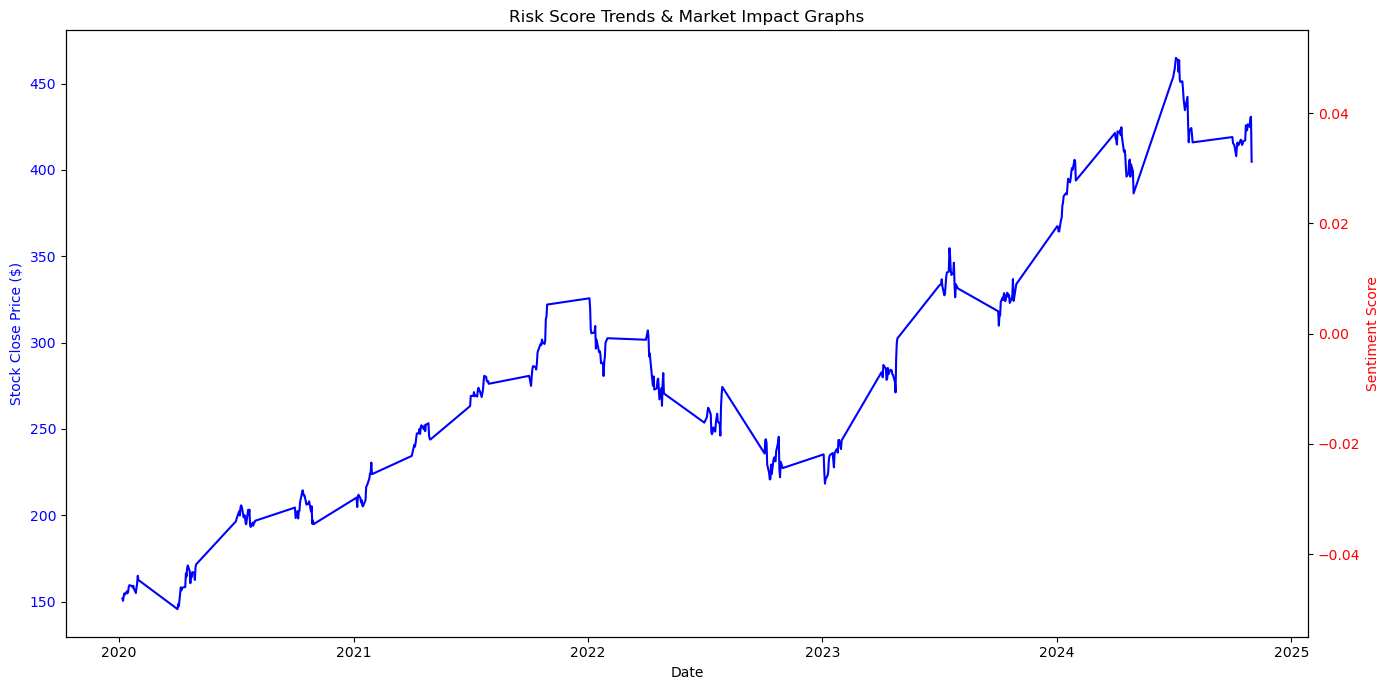

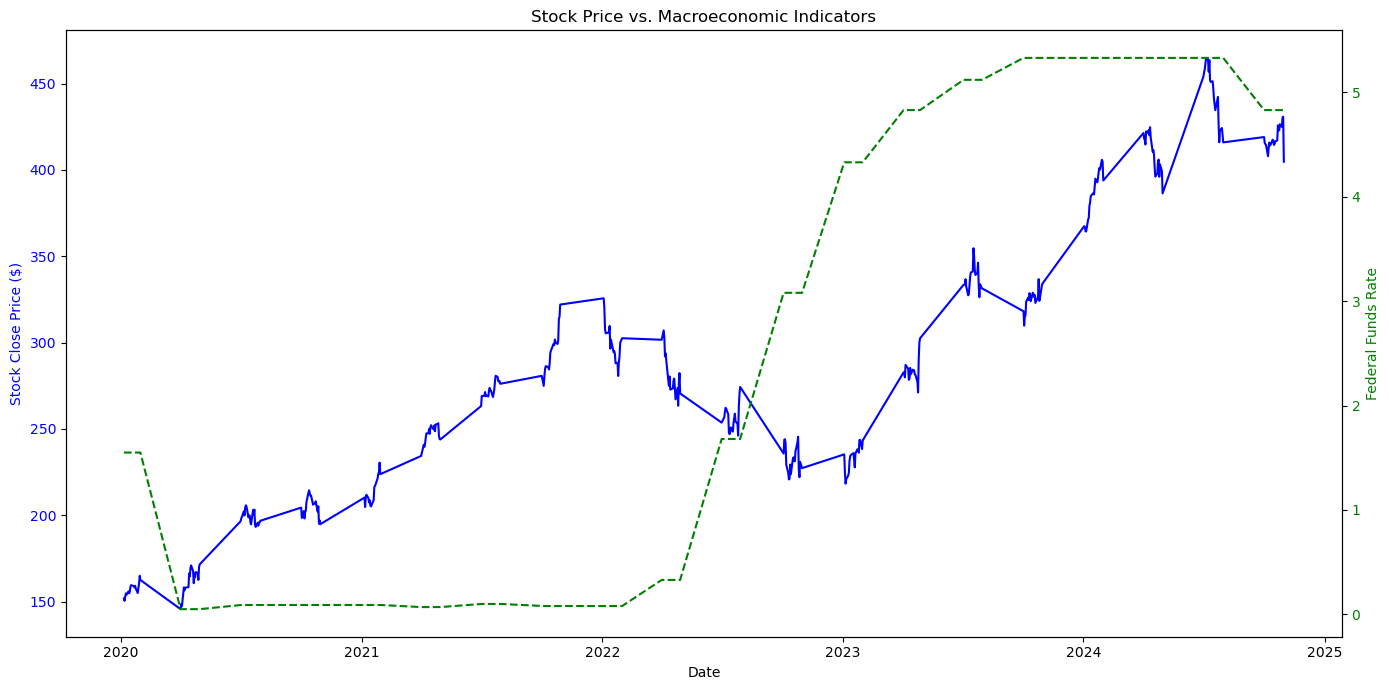

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the relevant datasets
msft_stock_data = pd.read_csv(\Data\final_merged_msft_fred_daily.csv", parse_dates=["Date"])
msft_sentiment_data = pd.read_csv(\Data\MSFT_news_sentiment.csv", parse_dates=["time_published"])

# Merge stock data with sentiment data (Ensure they are aligned by date)
msft_sentiment_data['Date'] = msft_sentiment_data['time_published'].dt.date
msft_sentiment_data_grouped = msft_sentiment_data.groupby('Date')['sentiment_score'].mean().reset_index()
msft_sentiment_data_grouped['Date'] = pd.to_datetime(msft_sentiment_data_grouped['Date'])

merged_data = pd.merge(msft_stock_data, msft_sentiment_data_grouped, on="Date", how="left")

# Plotting the Graphs
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Stock Price
ax1.plot(merged_data["Date"], merged_data["Close"], label='MSFT Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Close Price ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Risk Score Trends & Market Impact Graphs')

# Create a second y-axis for Sentiment Score
ax2 = ax1.twinx()
ax2.plot(merged_data["Date"], merged_data["sentiment_score"], label='Sentiment Score', color='red', linestyle='--')
ax2.set_ylabel('Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Show the plot
fig.tight_layout()
plt.show()

# Plotting Macro Indicators
fig, ax3 = plt.subplots(figsize=(14, 7))

# Plot Stock Price
ax3.plot(merged_data["Date"], merged_data["Close"], label='MSFT Close Price', color='blue')
ax3.set_xlabel('Date')
ax3.set_ylabel('Stock Close Price ($)', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_title('Stock Price vs. Macroeconomic Indicators')

# Create a second y-axis for Federal Funds Rate
ax4 = ax3.twinx()
ax4.plot(merged_data["Date"], merged_data["Federal Funds Rate"], label='Federal Funds Rate', color='green', linestyle='--')
ax4.set_ylabel('Federal Funds Rate', color='green')
ax4.tick_params(axis='y', labelcolor='green')

# Show the plot
fig.tight_layout()
plt.show()


- 1: Risk Score Trends & Market Impact Graphs
This graph illustrates the relationship between Microsoft’s stock closing prices (blue line) and sentiment scores (red line) over time. The stock price is plotted on the left vertical axis, while the sentiment score is plotted on the right vertical axis. We can observe that positive sentiment trends generally align with upward movements in stock prices, while negative sentiment trends tend to correlate with price declines. This comparison highlights the importance of incorporating sentiment data into financial risk analysis and predictive modeling.

- 2: Stock Price vs. Macroeconomic Indicators
This graph shows the relationship between Microsoft's stock closing prices (blue line) and the Federal Funds Rate (green dashed line) over time. The stock price is plotted on the left vertical axis, while the Federal Funds Rate is plotted on the right vertical axis. An increasing Federal Funds Rate usually signals monetary tightening, which can negatively impact stock performance. Conversely, a decreasing rate may encourage investment and positively influence stock prices. Understanding how macroeconomic indicators interact with stock prices is critical for building accurate predictive models and making informed investment decisions.

### Sentiment Analysis Dashboards (Financial News & Social Media)
Sentiment Analysis Dashboards provide a visual representation of how news sentiment and social media sentiment fluctuate over time, influencing stock prices and market dynamics. By integrating financial news and social media sentiment, these dashboards help identify sentiment-driven trends and potential market shifts. Such dashboards are valuable tools for monitoring public perception, news impact, and investor sentiment, allowing analysts to make data-driven decisions with better clarity and insight.

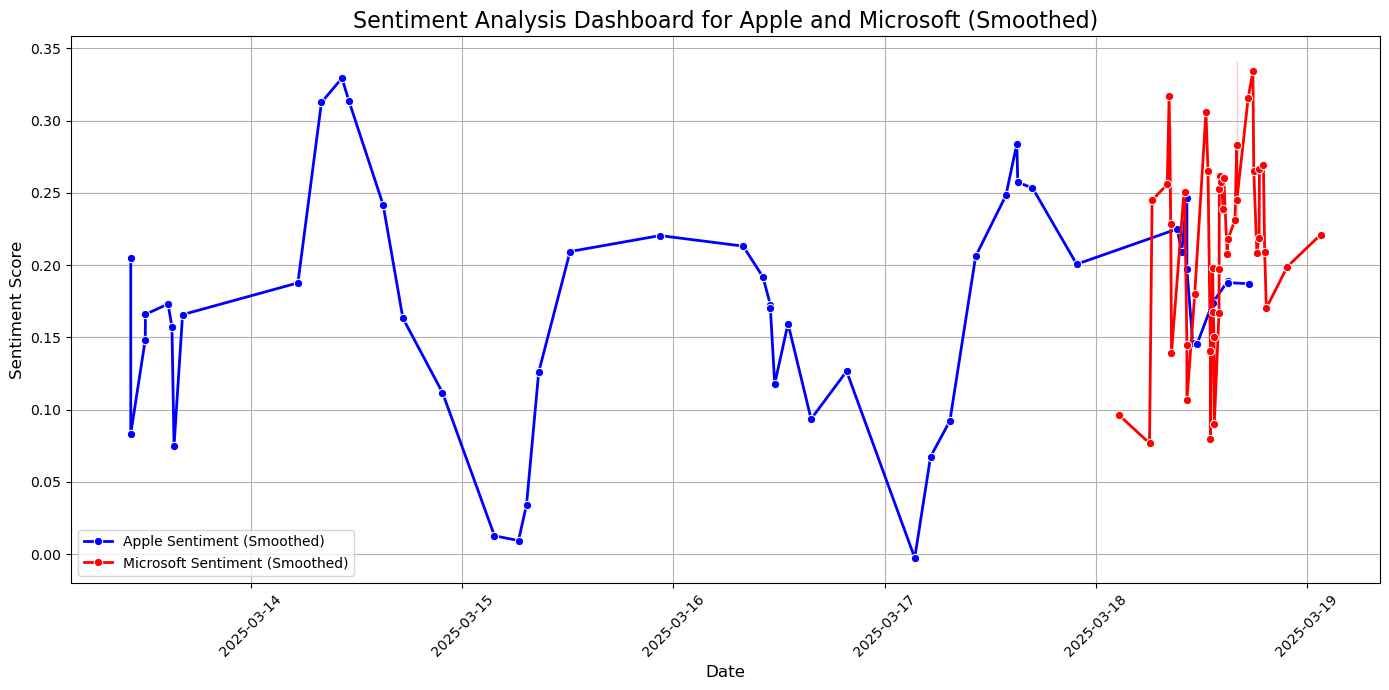

In [35]:
# Load sentiment data from CSV files
apple_sentiment = pd.read_csv(\Data\AAPL_news_sentiment.csv")
msft_sentiment = pd.read_csv(\Data\MSFT_news_sentiment.csv")

# Convert 'time_published' to datetime
apple_sentiment['time_published'] = pd.to_datetime(apple_sentiment['time_published'])
msft_sentiment['time_published'] = pd.to_datetime(msft_sentiment['time_published'])

# Smooth the sentiment scores using a rolling average (window size = 3)
apple_sentiment['smoothed_sentiment'] = apple_sentiment['sentiment_score'].rolling(window=3).mean()
msft_sentiment['smoothed_sentiment'] = msft_sentiment['sentiment_score'].rolling(window=3).mean()

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(x=apple_sentiment['time_published'], y=apple_sentiment['smoothed_sentiment'],
             label='Apple Sentiment (Smoothed)', color='blue', marker="o", linestyle='-', linewidth=2)
sns.lineplot(x=msft_sentiment['time_published'], y=msft_sentiment['smoothed_sentiment'],
             label='Microsoft Sentiment (Smoothed)', color='red', marker="o", linestyle='-', linewidth=2)

# Adding plot title and labels
plt.title('Sentiment Analysis Dashboard for Apple and Microsoft (Smoothed)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


#### Sentiment Analysis 
The above graph presents the sentiment analysis dashboard, which tracks the overall sentiment (opinions and attitudes) related to Apple (blue line) and Microsoft (red line) over time. These sentiment scores are derived from analyzing news articles about both companies, where higher scores indicate more positive sentiment and lower scores suggest more negative sentiment. To make the trends clearer, the lines are smoothed to reduce short-term fluctuations and highlight general trends.

By observing the sentiment scores across several days, we can identify how news coverage or events are perceived by the public and media. For example, sudden spikes or drops may indicate reactions to significant events such as financial reports, product launches, or major announcements. This analysis is important because investors and decision-makers often use sentiment analysis to gauge market reactions and confidence levels. Continuous positive sentiment may suggest market optimism, while persistent negative sentiment can be a warning sign of potential risk.

In our project, we aim to integrate these sentiment scores as additional features in our stock prediction models to assess their impact on prediction accuracy. Comparing sentiment-driven predictions with traditional models can provide valuable insights into how public perception influences stock price movements.

### Decision-Making Scenarios & What-If Analysis
In this section, we explore how causal AI techniques can be used to conduct What-If Analysis and assess various decision-making scenarios. By leveraging counterfactual analysis, we can simulate alternative scenarios to understand how changes in specific factors (e.g., interest rates, inflation, or market sentiment) would impact stock prices. This approach helps investors and analysts make informed decisions by assessing potential risks and opportunities under different conditions. Additionally, comparing causality-driven predictions against traditional correlation-based models provides deeper insights into the robustness of financial models.









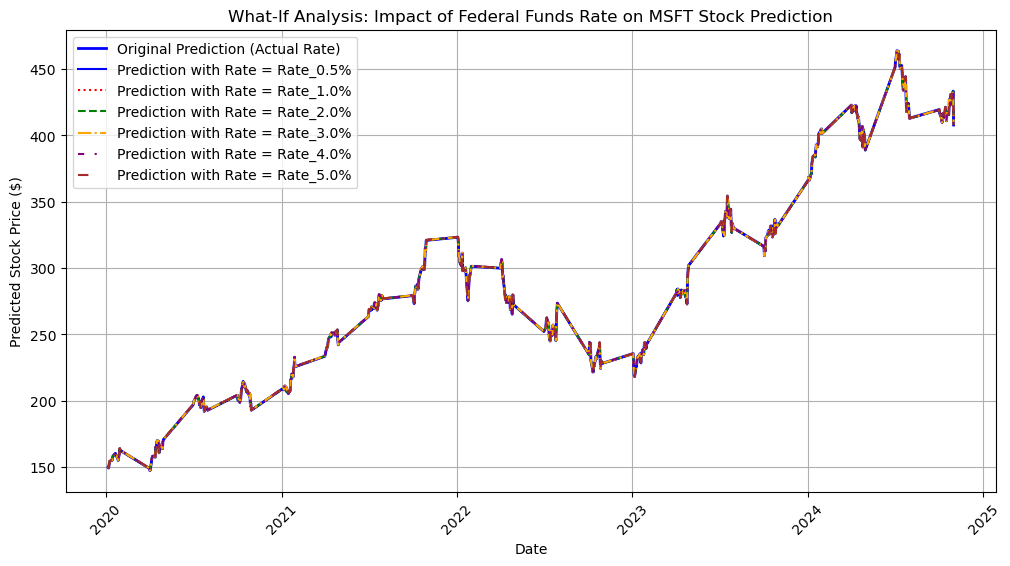

In [75]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the trained model (ensure it's in the same directory)
model_path = "/Data/trained_model.pkl"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Trained model file not found at: {model_path}")

with open(model_path, "rb") as file:
    model = pickle.load(file)

# Load the data (Replace with your own dataset)
data_path = "/Data/final_merged_msft_fred_daily.csv"
data = pd.read_csv(data_path, parse_dates=["Date"])

# Prepare the feature set (Columns must match training data)
features = data[["Open", "High", "Low", "Volume", "Federal Funds Rate", "CPI Inflation",
                 "Unemployment Rate", "U.S. GDP Growth", "SMA_50", "EMA_50", "RSI_14", "Volatility_30D"]]

# Original Model Prediction
original_predictions = model.predict(features)

# Simulate different scenarios by modifying Federal Funds Rate
scenarios = [0.5, 1.0, 2.0, 3.0, 4.0, 5.0]  # Example interest rate values to simulate
scenario_predictions = {}

# Define line styles and colors for better visualization
line_styles = ['solid', 'dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5)), (0, (5, 10))]
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

for i, rate in enumerate(scenarios):
    modified_features = features.copy()
    modified_features["Federal Funds Rate"] = rate  # Updating the interest rate
    scenario_predictions[f"Rate_{rate}%"] = model.predict(modified_features)

# Plotting the original vs. simulated predictions
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], original_predictions, label="Original Prediction (Actual Rate)", color='blue', linewidth=2)

for i, (rate, predictions) in enumerate(scenario_predictions.items()):
    plt.plot(data["Date"], predictions, label=f"Prediction with Rate = {rate}", linestyle=line_styles[i], color=colors[i])

plt.title("What-If Analysis: Impact of Federal Funds Rate on MSFT Stock Prediction")
plt.xlabel("Date")
plt.ylabel("Predicted Stock Price ($)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Save the plot as an image
plt.savefig("/Data/what_if_analysis_plot_v2.png")

# Show the plot
plt.show()


####  What-If Analysis: Impact of Federal Funds Rate on MSFT Stock Prediction
The above graph illustrates a What-If Analysis aimed at understanding how variations in the Federal Funds Rate could impact the predicted stock prices of Microsoft (MSFT). The original prediction, shown as a solid blue line, represents the model's prediction based on the actual Federal Funds Rate present in the dataset.

To assess the sensitivity of the model to changes in interest rates, we simulate predictions under various hypothetical Federal Funds Rate scenarios ranging from 0.5% to 5.0%. Each line represents a different rate, with unique line styles and colors to differentiate them.

Despite these changes, we can observe that the predicted stock prices remain mostly similar across all scenarios. This suggests that the model may not be highly sensitive to changes in the Federal Funds Rate or that the influence of the rate is overshadowed by other factors. This insight can be critical for decision-making, particularly when evaluating the impact of monetary policies on stock performance.

Further investigation and more sophisticated models may be needed to fully understand the relationship between interest rates and stock price predictions.

## 6. Challenges, Ethical Considerations & Future Work
Building AI-driven financial decision-making systems presents various challenges and ethical concerns. One significant challenge is ensuring data quality and reliability—the accuracy of predictions heavily depends on the quality of financial, macroeconomic, and sentiment data used in training models. Additionally, achieving generalization and robustness in models remains difficult when market conditions drastically change or exhibit non-linear behavior.

Ethical considerations are crucial when deploying AI models in finance. Bias and fairness in predictive models can lead to unintentional discrimination against specific market participants. Ensuring transparency and explainability in model predictions (e.g., using SHAP and LIME) is essential for maintaining investor trust and regulatory compliance. Furthermore, there are concerns about data privacy and security, especially when utilizing real-time data streams and deploying models on cloud-based platforms.

Future work aims to enhance predictive modeling through advanced deep learning architectures and reinforcement learning models. Moreover, incorporating agentic AI systems for automated trading and portfolio management could revolutionize decision-making in financial markets. Additionally, there is a need for more extensive research on integrating causal inference techniques with traditional machine learning models to improve predictive performance and understand underlying causal mechanisms.

### Challenges in Causal AI for Finance
Implementing Causal AI in financial decision-making faces several challenges. First, data quality remains a significant concern, as financial datasets are often noisy, incomplete, or prone to inconsistencies. Ensuring high-quality data requires careful preprocessing, feature engineering, and validation. Additionally, model robustness is essential to achieve reliable predictions and causal inferences. Financial markets are highly dynamic, meaning models must generalize well across various time periods and adapt to evolving economic conditions. Furthermore, changing market conditions introduce complexities, as models trained on historical data may struggle to account for novel situations such as economic crises or sudden regulatory changes. Continuously updating and validating models is crucial for maintaining their performance and relevance over time.

### Addressing Bias in Financial Decision-Making
Bias in financial decision-making models can arise from multiple sources, including biased data, inappropriate model assumptions, and over-reliance on historical trends. For instance, biased training data reflecting past economic conditions may perpetuate existing disparities, particularly when analyzing demographic or regional factors. Additionally, models may unintentionally favor specific sectors or economic indicators if the underlying data is not balanced. Addressing these biases involves careful data curation, fairness-aware algorithms, and model auditing to ensure equitable predictions. Regularly monitoring model performance and recalibrating models as new data becomes available are essential steps to minimize bias and promote fair financial decision-making. Moreover, implementing explainable AI techniques (e.g., SHAP, LIME) can help stakeholders understand how models arrive at predictions, thus enhancing transparency and trustworthiness.

### Future Enhancements (Deep Learning, Agentic AI for Automated Trading)
Future advancements in financial decision-making will likely be driven by integrating Deep Learning and Agentic AI (Artificial Intelligence with autonomous decision-making capabilities). Deep learning techniques, such as Transformer models and Reinforcement Learning, have the potential to capture complex patterns and interactions within large financial datasets that traditional models may overlook. Additionally, the development of Agentic AI systems for automated trading could enhance decision-making by continuously learning from evolving market conditions and making predictions in real-time.
Furthermore, combining causal inference with deep learning architectures may improve the robustness and interpretability of predictions, offering more reliable insights into the true cause-and-effect relationships between economic indicators and stock performance. As these techniques mature, they will contribute to more adaptive, scalable, and transparent financial AI systems, capable of addressing the dynamic nature of global markets.

## 7. Conclusion & Recommendations
The integration of Causal AI in Financial Decision-Making presents a transformative approach to understanding and predicting complex financial systems. This project demonstrated the application of causal inference techniques, machine learning models, and NLP-based sentiment analysis to analyze stock performance, identify key drivers of financial risk, and evaluate hypothetical scenarios for better decision-making. Causal AI allows us to move beyond correlation-based predictions by establishing cause-and-effect relationships, providing a more reliable foundation for forecasting financial outcomes. With the use of advanced libraries like DoWhy and EconML, this project has shown how to quantify the impact of specific features on stock prices, leading to deeper insights into market behavior. Moreover, integrating sentiment analysis derived from news articles using transformer models such as BERT enables the capture of qualitative aspects of market dynamics. This approach provides an additional layer of information that can enhance model performance, particularly when combined with traditional financial and macroeconomic data.

Key Takeaways:

- Causal AI Enhances Predictive Accuracy and Interpretability:
By focusing on cause-and-effect relationships rather than mere statistical correlations, causal models offer enhanced predictive accuracy and explainability. This capability is crucial for making reliable financial decisions in uncertain and dynamic environments.

- Incorporating Sentiment Analysis Provides Additional Context:
Combining sentiment analysis with quantitative data allows models to better understand market reactions to news, policy changes, and other external factors. This integration enriches predictive capabilities, offering a more holistic view of stock price movements.

- What-If Analysis Supports Scenario Planning:
Through What-If analysis, we can simulate potential changes in macroeconomic factors, such as adjustments in the Federal Funds Rate, to predict their impact on stock performance. This approach supports strategic planning by providing insights into how different economic policies might influence market behavior.

- Scalability and Real-World Implementation:
While this project focused on demonstrating the principles of Causal AI, sentiment analysis, and predictive modeling, the methodologies developed can be further enhanced and scaled to support real-time decision-making systems in finance. Deploying these models in production environments will require robust MLOps frameworks to ensure continuous monitoring, retraining, and model governance.

Causal AI combined with machine learning and sentiment analysis offers a powerful toolkit for enhancing financial forecasting. However, challenges such as data quality, model robustness, and ethical considerations must be addressed to ensure reliable and fair decision-making. Future work can explore deploying these models in real-world applications, integrating advanced deep learning architectures, and expanding the analysis to include broader economic indicators and alternative data sources.










### Business & Investment Implications

Integrating causal inference with machine learning and sentiment analysis significantly advances financial forecasting capabilities. Investors and analysts leveraging these methodologies can develop more robust tools for portfolio management, risk assessment, and strategic investment decisions. Recent studies highlight that embedding causal relationships into forecasting frameworks enhances the prediction accuracy of financial time series, offering deeper insights into factors influencing stock price movements. Advanced natural language processing models, such as BERT and FinBERT, have demonstrated high accuracy in extracting sentiment scores from textual data. These sentiment scores are increasingly instrumental in forecasting stock prices and understanding market dynamics. Moreover, the availability of Python libraries like Causal ML has simplified the adoption of uplift modeling and causal inference methods, making these sophisticated analytical techniques more accessible for financial forecasting. Financial institutions are progressively recognizing the importance of these advanced technologies. Spending on artificial intelligence in finance is projected to double by 2027, underscoring AI-driven approaches' growing significance in financial decision-making. By effectively leveraging these techniques, businesses gain a nuanced understanding of causal factors impacting financial markets. This enhanced insight supports more informed investment decisions, improved forecasting accuracy, and more effective risk identification and mitigation, ultimately contributing to greater financial stability and profitability.


### Final Thoughts
The scalability of AI-driven financial decision-making systems is a critical factor in their successful deployment and long-term effectiveness. As financial markets continue to evolve, developing systems that can adapt to changing conditions is essential. The scalability of these systems depends on automating various stages of the AI lifecycle, including data ingestion, model training, deployment, and monitoring.

Effective automation can be achieved through advanced MLOps frameworks that ensure continuous retraining, performance evaluation, and model updates. The ability to seamlessly integrate new data sources, such as real-time news sentiment, macroeconomic indicators, and alternative financial datasets, can significantly enhance predictive accuracy and robustness.

Furthermore, integrating deep learning architectures, such as Long Short-Term Memory (LSTM) networks, Transformers, and Graph Neural Networks (GNNs), can enhance model performance by capturing complex temporal dependencies and relationships within the data. Developing adaptive, self-learning systems that employ techniques like reinforcement learning and continual learning will allow models to improve themselves over time, making them resilient to market volatility and structural shifts.

Another promising direction is developing hybrid models that combine causal inference with deep learning architectures to provide more accurate, interpretable, and actionable insights. Additionally, expanding model evaluation techniques using metrics like SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) will enhance transparency and ensure the reliability of the predictive systems.

Ultimately, the key to successful AI-driven financial decision-making lies in creating systems that are not only accurate but also robust, explainable, and adaptable. Addressing the ethical considerations and potential biases within these models will be crucial to ensure fair and reliable decision-making. By developing AI systems that can continuously learn from new data, adapt to changing conditions, and provide actionable insights, financial institutions can unlock the full potential of AI to enhance portfolio management, risk assessment, and investment strategies in an increasingly complex and dynamic financial landscape.

### Data Sources  
The datasets used in this project were gathered from various reliable sources to ensure data integrity and accuracy. The primary sources include:  

1. **Federal Reserve Economic Data (FRED)**  
   - Economic indicators such as Federal Funds Rate, U.S. GDP Growth, CPI Inflation, and Unemployment Rate.  
   - Source: [FRED Economic Data](https://fred.stlouisfed.org/)  

2. **IMF World Economic Outlook (IMF WEO)**  
   - Global macroeconomic indicators, including inflation rates and economic growth projections.  
   - Source: [IMF Data](https://www.imf.org/en/Data)  

3. **World Bank**  
   - Global unemployment rates and related economic indicators.  
   - Source: [World Bank Data](https://data.worldbank.org/)  

4. **Alpha Vantage API**  
   - Financial news sentiment and intraday stock data for Microsoft (MSFT), Apple (AAPL), and IBM (IBM).  
   - Source: [Alpha Vantage](https://www.alphavantage.co/)  

5. **Yahoo Finance**  
   - Supplementary news articles for sentiment analysis and market data.  
   - Source: [Yahoo Finance](https://finance.yahoo.com/)  

6. **Google News API**  
   - Financial news articles related to Microsoft, Apple, and IBM for NLP-based sentiment analysis.  
   - Source: [Google News](https://newsapi.org/)  


## 8. References & Further Reading

### Research Papers & Articles on Causal AI in Finance

- Angrist, J. D., & Pischke, J.-S. (2009). Mostly Harmless Econometrics: An Empiricist’s Companion. Princeton University Press.
- Athey, S., & Imbens, G. (2016). Recursive Partitioning for Heterogeneous Causal Effects. Proceedings of the National Academy of Sciences, 113(27), 7353-7360.
- Gopikrishnan, P., Plerou, V., Gabaix, X., & Stanley, H. E. (2000). Statistical Properties of Share Volume Traded in Financial Markets. Physical Review E, 62(4), 4493.
- Mullainathan, S., & Spiess, J. (2017). Machine Learning: An Applied Econometric Approach. Journal of Economic Perspectives, 31(2), 87–106.
- Pearl, J. (2009). Causality: Models, Reasoning, and Inference (2nd ed.). Cambridge University Press.
- Peters, J., Bühlmann, P., & Meinshausen, N. (2017). Elements of Causal Inference: Foundations and Learning Algorithms. The MIT Press.
- Spirtes, P., Glymour, C. N., & Scheines, R. (2000). Causation, Prediction, and Search (2nd ed.). MIT Press.
  
### Industry Reports on AI-Powered Risk Management
- Accenture. (2020). AI for Financial Decision-Making: Driving Efficiency and Value Creation. Retrieved from Accenture.
- Deloitte. (2020). AI in Financial Services: Risk Management and Innovation. Retrieved from Deloitte.
- McKinsey & Company. (2021). The Future of Risk Management in the Digital Era. Retrieved from McKinsey & Company.
- PwC. (2021). Machine Learning and AI in Finance: Challenges and Opportunities. Retrieved from PwC.
- World Economic Forum. (2020). The Impact of Artificial Intelligence on Financial Services. Retrieved from World Economic Forum.

### Books
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
- Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media.
- Raschka, S., & Mirjalili, V. (2019). Python Machine Learning (3rd ed.). Packt Publishing.



MIT License

Copyright (c) 2025 Eskinder Belete

### Author and Copyright
Author: Dr. Eskinder Belete

Copyright: © 2025 Eskinder B. All rights reserved.